In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.model_selection import train_test_split
from apyori import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
online_sales = pd.read_csv("E:\CS\DS360\DS360-20230716T150307Z-001\DS360\Data Science 360\Data Science 360\Machine Learning\Case Studies\Evaluation Case Study\Finding Marketing Insights\Datasets\Online_Sales.csv")

In [4]:
customer_data = pd.read_excel("E:\\CS\\DS360\\DS360-20230716T150307Z-001\\DS360\\Data Science 360\\Data Science 360\\Machine Learning\\Case Studies\\Evaluation Case Study\\Finding Marketing Insights\\Datasets\\CustomersData.xlsx")

In [5]:
discount_coupon = pd.read_csv("E:\\CS\\DS360\\DS360-20230716T150307Z-001\\DS360\\Data Science 360\\Data Science 360\\Machine Learning\\Case Studies\\Evaluation Case Study\\Finding Marketing Insights\\Datasets\\Discount_Coupon.csv")

In [6]:
marketing_spend = pd.read_csv("E:\\CS\\DS360\\DS360-20230716T150307Z-001\\DS360\\Data Science 360\\Data Science 360\\Machine Learning\\Case Studies\\Evaluation Case Study\\Finding Marketing Insights\\Datasets\\Marketing_Spend.csv")

In [7]:
tax_amount = pd.read_excel("E:\CS\DS360\DS360-20230716T150307Z-001\DS360\Data Science 360\Data Science 360\Machine Learning\Case Studies\Evaluation Case Study\Finding Marketing Insights\Datasets\Tax_amount.xlsx")

In [8]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  int64  
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.0+ MB


In [9]:
online_sales['Transaction_Date'].value_counts()

Transaction_Date
20191127    335
20190713    311
20190816    298
20190802    292
20190731    291
           ... 
20190205     41
20190128     39
20191224     35
20190820     32
20190701     27
Name: count, Length: 365, dtype: int64

In [10]:
online_sales['Transaction_Date'] = pd.to_datetime(online_sales['Transaction_Date'], format='%Y%m%d')

In [11]:
online_sales['Transaction_Date']

0       2019-01-01
1       2019-01-01
2       2019-01-01
3       2019-01-01
4       2019-01-01
           ...    
52919   2019-12-31
52920   2019-12-31
52921   2019-12-31
52922   2019-12-31
52923   2019-12-31
Name: Transaction_Date, Length: 52924, dtype: datetime64[ns]

In [12]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 4.0+ MB


In [13]:
online_sales.head(3)

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  
0         1     153.71               6.5          Used  
1         1     153.71               6.5          Used  
2         1       2.05               6.5          Used

In [14]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [15]:
discount_coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              204 non-null    object
 1   Product_Category   204 non-null    object
 2   Coupon_Code        204 non-null    object
 3   Discount_pct       204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [16]:
discount_coupon.columns = discount_coupon.columns.str.strip()

In [17]:
discount_coupon['Product_Category']

0                   Apparel
1                   Apparel
2                   Apparel
3                  Nest-USA
4                  Nest-USA
               ...         
199    Notebooks & Journals
200    Notebooks & Journals
201                 Android
202                 Android
203                 Android
Name: Product_Category, Length: 204, dtype: object

In [18]:
marketing_spend['Date'] = pd.to_datetime(marketing_spend['Date'])

In [19]:
marketing_spend['Date'] = marketing_spend['Date'].dt.strftime('%Y-%m-%d')

In [20]:
marketing_spend['Date'] = pd.to_datetime(marketing_spend['Date'])

In [21]:
marketing_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Offline_Spend  365 non-null    int64         
 2   Online_Spend   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


In [22]:
tax_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


In [23]:
merge_df1 = pd.merge(online_sales, customer_data, on='CustomerID', how='left')

In [24]:
merge_df1.head(3)

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Gender Location  \
0         1     153.71               6.5          Used      M  Chicago   
1         1     153.71               6.5          Used      M  Chicago   
2         1       2.05               6.5          Used      M  Chicago   

   Tenure_Months  
0             12  
1             12  
2             12

In [25]:
merge_df2 = pd.merge(merge_df1, tax_amount, on='Product_Category', how='left')

In [26]:
merge_df2.head(3)

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Gender Location  \
0         1     153.71               6.5          Used      M  Chicago   
1         1     153.71               6.5          Used      M  Chicago   
2         1       2.05               6.5          Used      M  Chicago   

   Tenure_Months  GST  
0             12  0.1  
1             12  0.1  
2             12  0.1

In [27]:
marketing_spend.head()

Date  Offline_Spend  Online_Spend
0 2019-01-01           4500       2424.50
1 2019-01-02           4500       3480.36
2 2019-01-03           4500       1576.38
3 2019-01-04           4500       2928.55
4 2019-01-05           4500       4055.30

In [28]:
date_counts = merge_df2['Transaction_Date'].value_counts().reset_index()
date_counts.columns = ['Transaction_Date', 'Transaction_Count']

In [29]:
date_counts

Transaction_Date  Transaction_Count
0         2019-11-27                335
1         2019-07-13                311
2         2019-08-16                298
3         2019-08-02                292
4         2019-07-31                291
..               ...                ...
360       2019-02-05                 41
361       2019-01-28                 39
362       2019-12-24                 35
363       2019-08-20                 32
364       2019-07-01                 27

[365 rows x 2 columns]

In [30]:
merged_df = pd.merge(marketing_spend, date_counts, left_on='Date', right_on='Transaction_Date', how='left')

In [31]:
merged_df.head(3)

Date  Offline_Spend  Online_Spend Transaction_Date  Transaction_Count
0 2019-01-01           4500       2424.50       2019-01-01                 89
1 2019-01-02           4500       3480.36       2019-01-02                115
2 2019-01-03           4500       1576.38       2019-01-03                207

In [32]:
merged_df['Distributed_Offline_Spend'] = merged_df['Offline_Spend'] / merged_df['Transaction_Count']
merged_df['Distributed_Online_Spend'] = merged_df['Online_Spend'] / merged_df['Transaction_Count']

final_merged_df = pd.merge(merge_df2, merged_df[['Transaction_Date', 'Distributed_Offline_Spend', 'Distributed_Online_Spend']], on='Transaction_Date', how='left')

In [33]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 52924 non-null  int64         
 1   Transaction_ID             52924 non-null  int64         
 2   Transaction_Date           52924 non-null  datetime64[ns]
 3   Product_SKU                52924 non-null  object        
 4   Product_Description        52924 non-null  object        
 5   Product_Category           52924 non-null  object        
 6   Quantity                   52924 non-null  int64         
 7   Avg_Price                  52924 non-null  float64       
 8   Delivery_Charges           52924 non-null  float64       
 9   Coupon_Status              52924 non-null  object        
 10  Gender                     52924 non-null  object        
 11  Location                   52924 non-null  object        
 12  Tenu

In [34]:
final_merged_df['Month'] = final_merged_df['Transaction_Date'].dt.month

In [35]:
final_merged_df['Month']

0         1
1         1
2         1
3         1
4         1
         ..
52919    12
52920    12
52921    12
52922    12
52923    12
Name: Month, Length: 52924, dtype: int32

In [36]:
final_merged_df['Month'] = pd.to_datetime(final_merged_df['Month'], format='%m').dt.strftime('%b')

In [37]:
final_merged_df['Month']

0        Jan
1        Jan
2        Jan
3        Jan
4        Jan
        ... 
52919    Dec
52920    Dec
52921    Dec
52922    Dec
52923    Dec
Name: Month, Length: 52924, dtype: object

In [38]:
final_merged_df.head(3)

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Gender Location  \
0         1     153.71               6.5          Used      M  Chicago   
1         1     153.71               6.5          Used      M  Chicago   
2         1       2.05               6.5          Used      M  Chicago   

   Tenure_Months  GST  Distributed_Offline_Spend  Distributed_Online_Spend  \
0             12  0.1                  50.561798                 27.241573   
1             12  0.1                  50.561798                 27.241573   
2             12  0.1                  50.561798                 27.241573   

  Month  
0   Jan  
1   Jan  
2   Jan

In [39]:
df = pd.merge(final_merged_df, discount_coupon, left_on=['Month', 'Product_Category'], right_on=['Month', 'Product_Category'], how='left')

In [40]:
df.head(5)

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Gender Location  \
0         1     153.71               6.5          Used      M  Chicago   
1         1     153.71               6.5          Used      M  Chicago   
2         1       2.05               6.5          Used      M  Chicago   
3         5      17.53               6.5      Not Used      M  Chicago   
4         1      16.50               6.5          Used      M  Chicago   

   Tenure_Months   GST  Distributed_Offline_Spend  Distributed_Online_Spend  \
0             12  0.10                  50.561798                 27.241573   
1             12  0.10                  50.561798                 27.241573   
2             12  0.10                  50.561798                 27.241573   
3             12  0.18                  50.561798                 27.241573   
4             12  0.18                  50.561798                 27.241573   

  Month Coupon_Code  Discount_pct  
0   Jan      ELEC10          10.0  
1   Jan      ELEC10          10.0  
2   Jan       OFF10          10.0  
3   Jan      SALE10          10.0  
4   Jan       AIO10          10.0

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 52924 non-null  int64         
 1   Transaction_ID             52924 non-null  int64         
 2   Transaction_Date           52924 non-null  datetime64[ns]
 3   Product_SKU                52924 non-null  object        
 4   Product_Description        52924 non-null  object        
 5   Product_Category           52924 non-null  object        
 6   Quantity                   52924 non-null  int64         
 7   Avg_Price                  52924 non-null  float64       
 8   Delivery_Charges           52924 non-null  float64       
 9   Coupon_Status              52924 non-null  object        
 10  Gender                     52924 non-null  object        
 11  Location                   52924 non-null  object        
 12  Tenu

In [42]:
df.isnull().sum()

CustomerID                     0
Transaction_ID                 0
Transaction_Date               0
Product_SKU                    0
Product_Description            0
Product_Category               0
Quantity                       0
Avg_Price                      0
Delivery_Charges               0
Coupon_Status                  0
Gender                         0
Location                       0
Tenure_Months                  0
GST                            0
Distributed_Offline_Spend      0
Distributed_Online_Spend       0
Month                          0
Coupon_Code                  400
Discount_pct                 400
dtype: int64

In [43]:
df['Discount_pct'] = df['Discount_pct'].fillna(df['Discount_pct'].mode()[0])
df['Coupon_Code'] = df['Coupon_Code'].fillna(df['Coupon_Code'].mode()[0])

In [44]:
df['Discount_pct'].mode()[0]

20.0

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 52924 non-null  int64         
 1   Transaction_ID             52924 non-null  int64         
 2   Transaction_Date           52924 non-null  datetime64[ns]
 3   Product_SKU                52924 non-null  object        
 4   Product_Description        52924 non-null  object        
 5   Product_Category           52924 non-null  object        
 6   Quantity                   52924 non-null  int64         
 7   Avg_Price                  52924 non-null  float64       
 8   Delivery_Charges           52924 non-null  float64       
 9   Coupon_Status              52924 non-null  object        
 10  Gender                     52924 non-null  object        
 11  Location                   52924 non-null  object        
 12  Tenu

In [46]:
df.head(3)

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Gender Location  \
0         1     153.71               6.5          Used      M  Chicago   
1         1     153.71               6.5          Used      M  Chicago   
2         1       2.05               6.5          Used      M  Chicago   

   Tenure_Months  GST  Distributed_Offline_Spend  Distributed_Online_Spend  \
0             12  0.1                  50.561798                 27.241573   
1             12  0.1                  50.561798                 27.241573   
2             12  0.1                  50.561798                 27.241573   

  Month Coupon_Code  Discount_pct  
0   Jan      ELEC10          10.0  
1   Jan      ELEC10          10.0  
2   Jan       OFF10          10.0

### 1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level

In [47]:
df['Invoice_Value'] = ((df['Quantity']*df['Avg_Price'])+(1-df['Discount_pct'])+(1+df['GST']))+df['Delivery_Charges']

In [48]:
df['Invoice_Value']

0        152.31
1        152.31
2          0.65
3         86.33
4         15.18
          ...  
52919     99.90
52920     27.60
52921    130.48
52922    381.20
52923    314.17
Name: Invoice_Value, Length: 52924, dtype: float64

In [310]:
df.to_csv("df.csv", index=False)

### 2. Perform Detailed exploratory analysis

###### 1. Understanding how many customers acquired every month

In [49]:
acq_cust = pd.DataFrame(df.groupby('Month').CustomerID.count())

In [50]:
acq_cust = acq_cust.reset_index()

In [51]:
month_order = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

In [52]:
acq_cust['Index'] = acq_cust['Month'].map(month_order)

In [53]:
acq_cust = acq_cust.sort_values(by='Index')

In [54]:
acq_cust.set_index('Month', inplace=True)

In [55]:
acq_cust.drop(columns=['Index'], inplace=True)

In [57]:
acq_cust.rename(columns={'CustomerID':'MonthlyAcqCust'}, inplace=True)

In [58]:
acq_cust

MonthlyAcqCust
Month                
Jan              4063
Feb              3284
Mar              4346
Apr              4150
May              4572
Jun              4193
Jul              5251
Aug              6150
Sep              4288
Oct              4164
Nov              3961
Dec              4502

In [59]:
acq_cust.to_csv('acq_cust.csv', index=False)

##### 2.  Understand the retention of customers on month on month basis

In [60]:
df['TransactionMonth'] = df['Transaction_Date'].dt.to_period('M')

In [96]:
monthly_retention = df.groupby('TransactionMonth')['CustomerID'].nunique().reset_index()

In [97]:
monthly_retention

TransactionMonth  CustomerID
0           2019-01         215
1           2019-02         109
2           2019-03         208
3           2019-04         224
4           2019-05         200
5           2019-06         259
6           2019-07         236
7           2019-08         300
8           2019-09         193
9           2019-10         210
10          2019-11         188
11          2019-12         236

In [98]:
monthly_retention = pd.DataFrame(monthly_retention)

In [99]:
monthly_retention.rename(columns={'CustomerID':'Customers'}, inplace=True)

In [100]:
monthly_retention

TransactionMonth  Customers
0           2019-01        215
1           2019-02        109
2           2019-03        208
3           2019-04        224
4           2019-05        200
5           2019-06        259
6           2019-07        236
7           2019-08        300
8           2019-09        193
9           2019-10        210
10          2019-11        188
11          2019-12        236

In [101]:
monthly_retention.to_csv("cust_retention.csv", index=False)

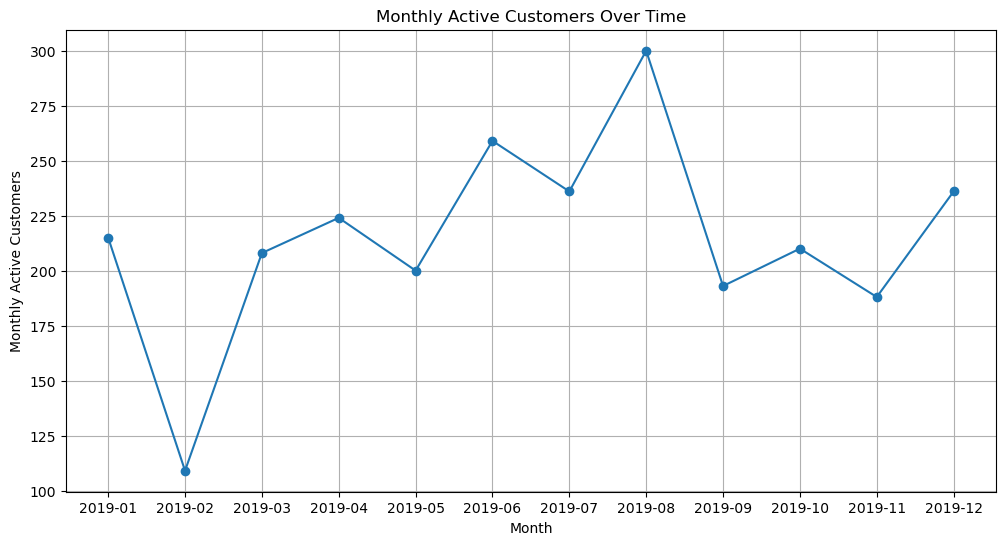

In [102]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_retention['TransactionMonth'].astype(str), monthly_retention['Customers'], marker='o', linestyle='-')
plt.title('Monthly Active Customers Over Time')
plt.xlabel('Month')
plt.ylabel('Monthly Active Customers')
plt.grid(True)
plt.show()

###### 3. How the revenues from existing/new customers on month on month basis

In [103]:
cust_revenue = df.loc[:, ['CustomerID', 'Transaction_Date', 'Invoice_Value']]

In [104]:
cust_revenue['Month'] = cust_revenue['Transaction_Date'].dt.month

In [105]:
revenue = pd.DataFrame(cust_revenue.groupby(['Month', 'CustomerID'])['Invoice_Value'].sum())

In [106]:
revenue.head(12)

Invoice_Value
Month CustomerID               
1     12431             2552.27
      12433            11534.58
      12471               48.04
      12472              769.95
      12583             1276.07
      12662             1772.85
      12686              972.96
      12738             1763.25
      12748              249.29
      12791              137.58
      12838             5102.23
      12855              886.13

In [107]:
revenue.to_csv("monthly_revenue.csv", index=False)

##### 4. How the discounts playing role in the revenues?

In [108]:
df['revenue'] = df['Invoice_Value']-((1+df['GST'])+df['Delivery_Charges'])

In [109]:
discount = df.loc[:, ['Discount_pct', 'revenue']]

In [110]:
discount = pd.DataFrame(discount.groupby('Discount_pct')['revenue'].sum())

In [111]:
discount

revenue
Discount_pct            
10.0          1418262.46
20.0          1201108.25
30.0          1048327.91

In [112]:
discount.to_csv("discount.csv", index=False)

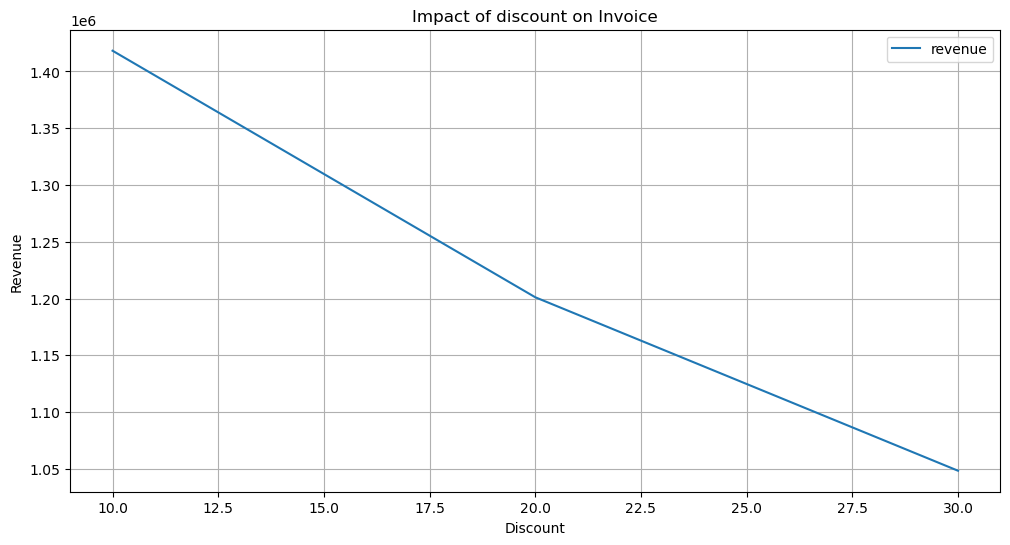

In [113]:
plt.figure(figsize=(12, 6))
sns.lineplot(discount)
plt.title('Impact of discount on Invoice')
plt.xlabel('Discount')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

##### 5. Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…

In [114]:
# Group by month and calculate the sum of revenue
monthly_revenue = pd.DataFrame(df.groupby(df['Transaction_Date'].dt.to_period('M'))['revenue'].sum()).reset_index()

# Group by week and calculate the sum of revenue
weekly_revenue = pd.DataFrame(df.groupby(df['Transaction_Date'].dt.to_period('W'))['revenue'].sum()).reset_index()
le = LabelEncoder()
weekly_revenue['Week'] = le.fit_transform(weekly_revenue['Transaction_Date'])+1
weekly_revenue['Week'] = "Week " + weekly_revenue['Week'].astype(str)
weekly_revenue.drop(columns=['Transaction_Date'], inplace=True)
weekly_revenue.set_index('Week', inplace=True)
weekly_revenue.reset_index(inplace=True)


# Group by day and calculate the sum of revenue
daily_revenue = pd.DataFrame(df.groupby(df['Transaction_Date'].dt.to_period('D'))['revenue'].sum()).reset_index()

In [115]:
daily_revenue.to_csv("daily_revenue.csv", index=False)
weekly_revenue.to_csv("weekly_revenue.csv", index=False)
monthly_revenue.to_csv("monthly_revenue.csv", index=False)

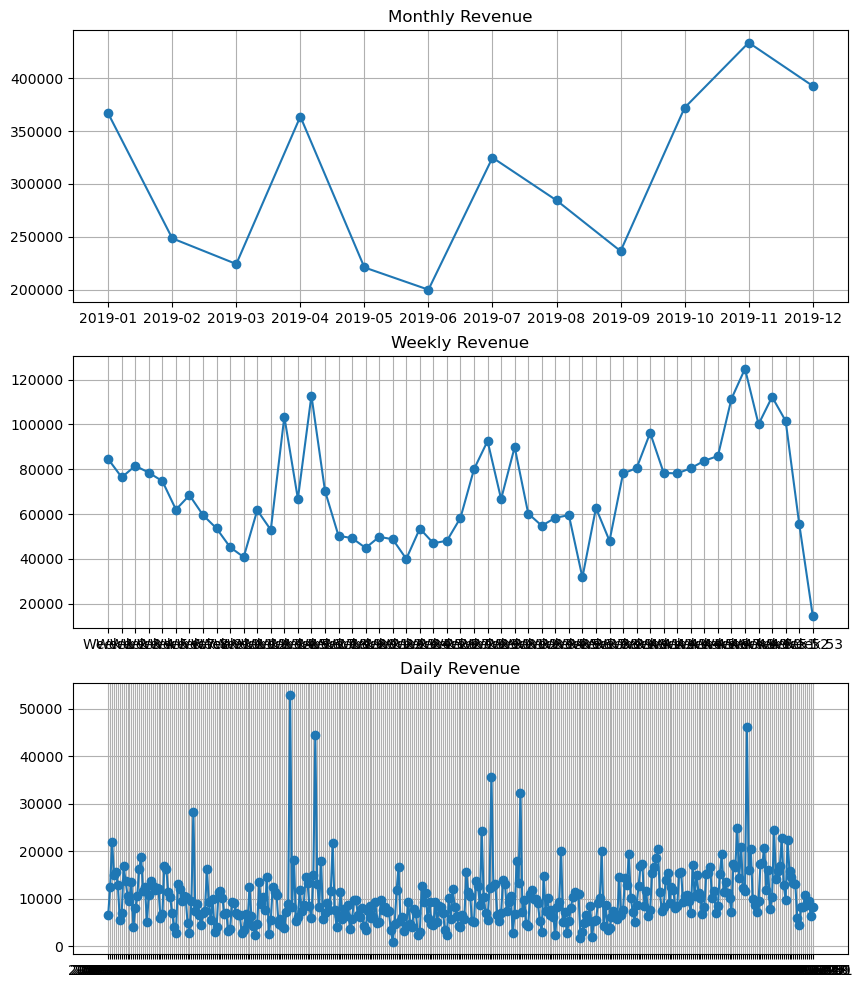

In [116]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot monthly revenue
axs[0].plot(monthly_revenue['Transaction_Date'].astype(str), monthly_revenue['revenue'], marker='o', linestyle='-', label='Weekly Revenue')
axs[0].set_title("Monthly Revenue")
axs[0].grid(True)


# Plot weekly revenue
axs[1].plot(weekly_revenue['Week'], weekly_revenue['revenue'], marker='o', linestyle='-', label='Weekly Revenue')
axs[1].set_title('Weekly Revenue')
axs[1].grid(True)


# Plot daily revenue
axs[2].plot(daily_revenue['Transaction_Date'].astype(str), daily_revenue['revenue'], marker='o', linestyle='-', label='Daily Revenue')
axs[2].set_title('Daily Revenue')
axs[2].grid(True)

In [117]:
# Orders

In [118]:
monthly_orders = pd.DataFrame(df.groupby(df['Transaction_Date'].dt.to_period('M'))['Transaction_ID'].sum()).reset_index()
monthly_orders.rename(columns={'Transaction_ID':'Number_of_Orders'}, inplace=True)
weekly_orders = pd.DataFrame(df.groupby(df['Transaction_Date'].dt.to_period('W'))['Transaction_ID'].sum()).reset_index()
le = LabelEncoder()
weekly_orders['Week'] = le.fit_transform(weekly_orders['Transaction_Date'])+1
weekly_orders['Week'] = "Week " + weekly_orders['Week'].astype(str)
weekly_orders.drop(columns=['Transaction_Date'], inplace=True)
weekly_orders.set_index('Week', inplace=True)
weekly_orders.reset_index(inplace=True)
weekly_orders.rename(columns={'Transaction_ID':'Number_of_Orders'}, inplace=True)
daily_orders = pd.DataFrame(df.groupby(df['Transaction_Date'].dt.to_period('D'))['Transaction_ID'].sum()).reset_index()
daily_orders.rename(columns={'Transaction_ID':'Number_of_Orders'}, inplace=True)

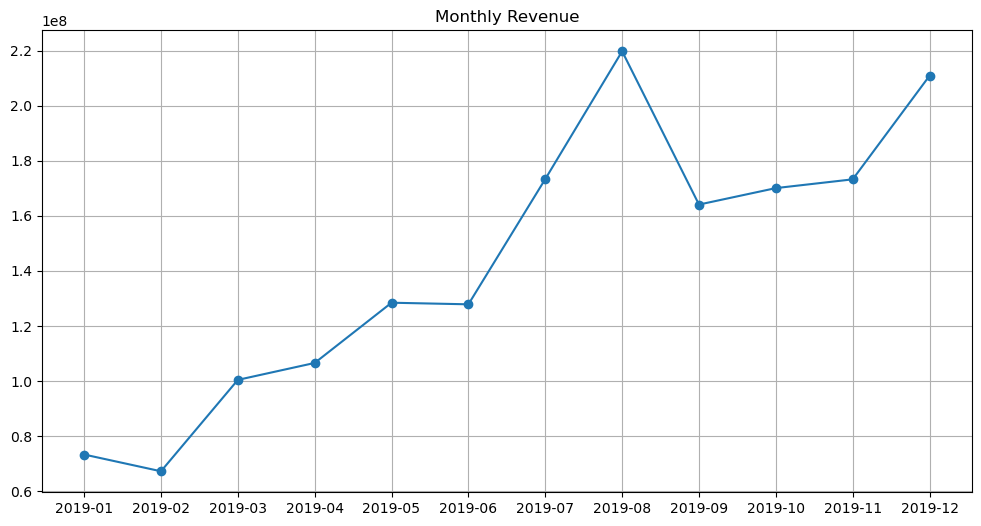

In [119]:
# Plot monthly revenue
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders['Transaction_Date'].astype(str), monthly_orders['Number_of_Orders'], marker='o', linestyle='-', label='Weekly Revenue')
plt.title("Monthly Revenue")
plt.grid(True)

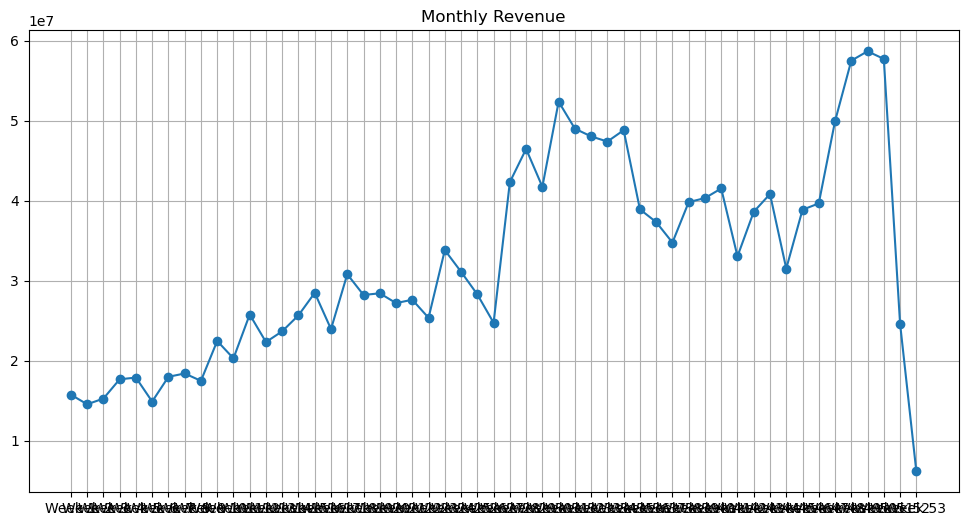

In [120]:
# Plot weekly revenue
plt.figure(figsize=(12, 6))
plt.plot(weekly_orders['Week'], weekly_orders['Number_of_Orders'], marker='o', linestyle='-', label='Weekly Revenue')
plt.title("Monthly Revenue")
plt.grid(True)

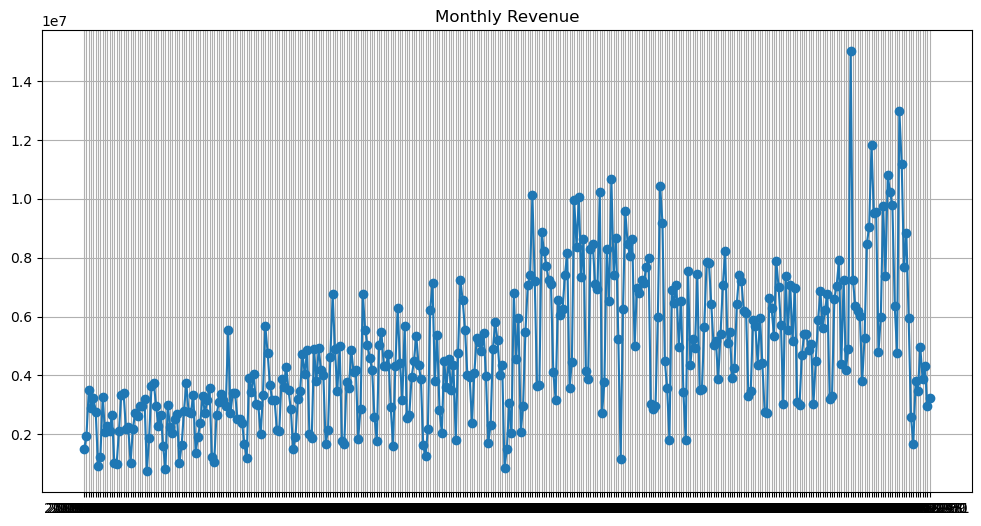

In [121]:
# Plot daily revenue
plt.figure(figsize=(12, 6))
plt.plot(daily_orders['Transaction_Date'].astype(str), daily_orders['Number_of_Orders'], marker='o', linestyle='-', label='Weekly Revenue')
plt.title("Monthly Revenue")
plt.grid(True)

In [122]:
monthly_avg_price = pd.DataFrame(df.groupby(df['Transaction_Date'].dt.to_period('M'))['Avg_Price'].sum()).reset_index()
weekly_avg_price = pd.DataFrame(df.groupby(df['Transaction_Date'].dt.to_period('W'))['Avg_Price'].sum()).reset_index()
le = LabelEncoder()
weekly_avg_price['Week'] = le.fit_transform(weekly_avg_price['Transaction_Date'])+1
weekly_avg_price['Week'] = "Week " + weekly_avg_price['Week'].astype(str)
weekly_avg_price.drop(columns=['Transaction_Date'], inplace=True)
weekly_avg_price.set_index('Week', inplace=True)
weekly_avg_price.reset_index(inplace=True)
daily_avg_price = pd.DataFrame(df.groupby(df['Transaction_Date'].dt.to_period('D'))['Avg_Price'].sum()).reset_index()

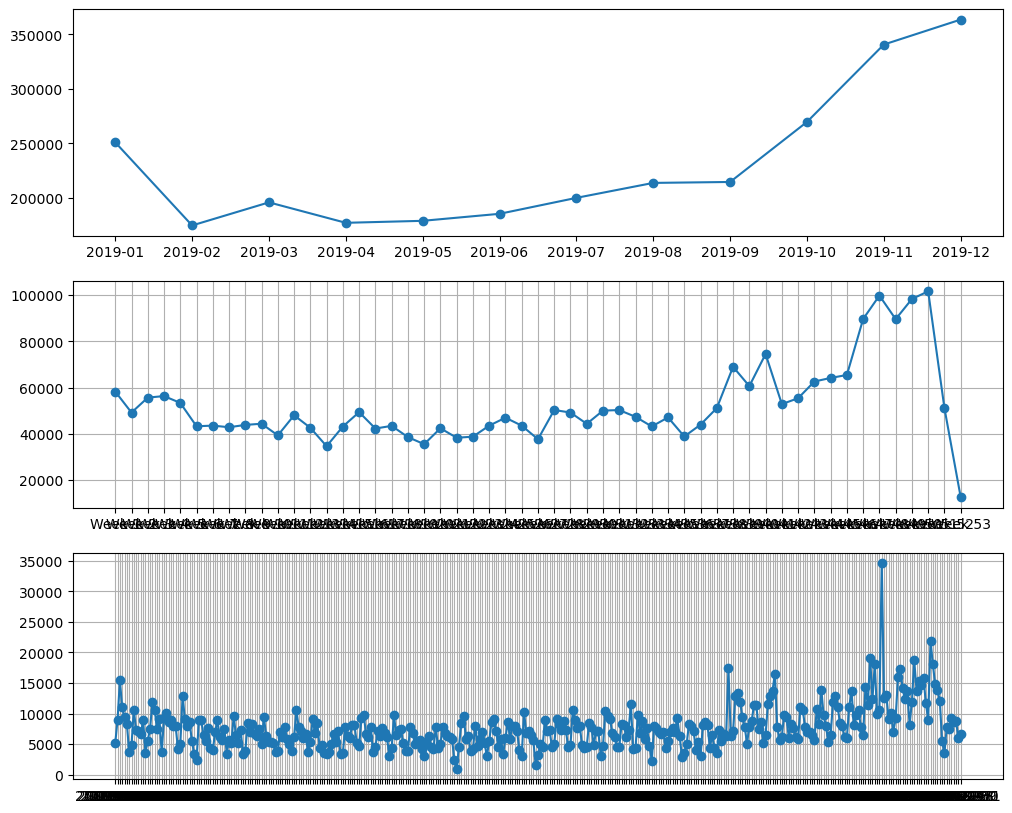

In [123]:
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# Plot monthly revenue
axs[0].plot(monthly_avg_price['Transaction_Date'].astype(str), monthly_avg_price['Avg_Price'], marker='o', linestyle='-', label='Weekly Revenue')
axs[1].grid(True)

# Plot weekly revenue
axs[1].plot(weekly_avg_price['Week'], weekly_avg_price['Avg_Price'], marker='o', linestyle='-', label='Weekly Revenue')
axs[1].grid(True)


# Plot daily revenue
axs[2].plot(daily_avg_price['Transaction_Date'].astype(str), daily_avg_price['Avg_Price'], marker='o', linestyle='-', label='Weekly Revenue')
axs[2].grid(True)

In [124]:
monthly_quantity = pd.DataFrame(df.groupby(df['Transaction_Date'].dt.to_period('M'))['Avg_Price'].sum()).reset_index()
weekly_quantity = pd.DataFrame(df.groupby(df['Transaction_Date'].dt.to_period('W'))['Avg_Price'].sum()).reset_index()
le = LabelEncoder()
weekly_quantity['Week'] = le.fit_transform(weekly_quantity['Transaction_Date'])+1
weekly_quantity['Week'] = "Week " + weekly_quantity['Week'].astype(str)
weekly_quantity.drop(columns=['Transaction_Date'], inplace=True)
weekly_quantity.set_index('Week', inplace=True)
weekly_quantity.reset_index(inplace=True)
daily_quantity = pd.DataFrame(df.groupby(df['Transaction_Date'].dt.to_period('D'))['Avg_Price'].sum()).reset_index()

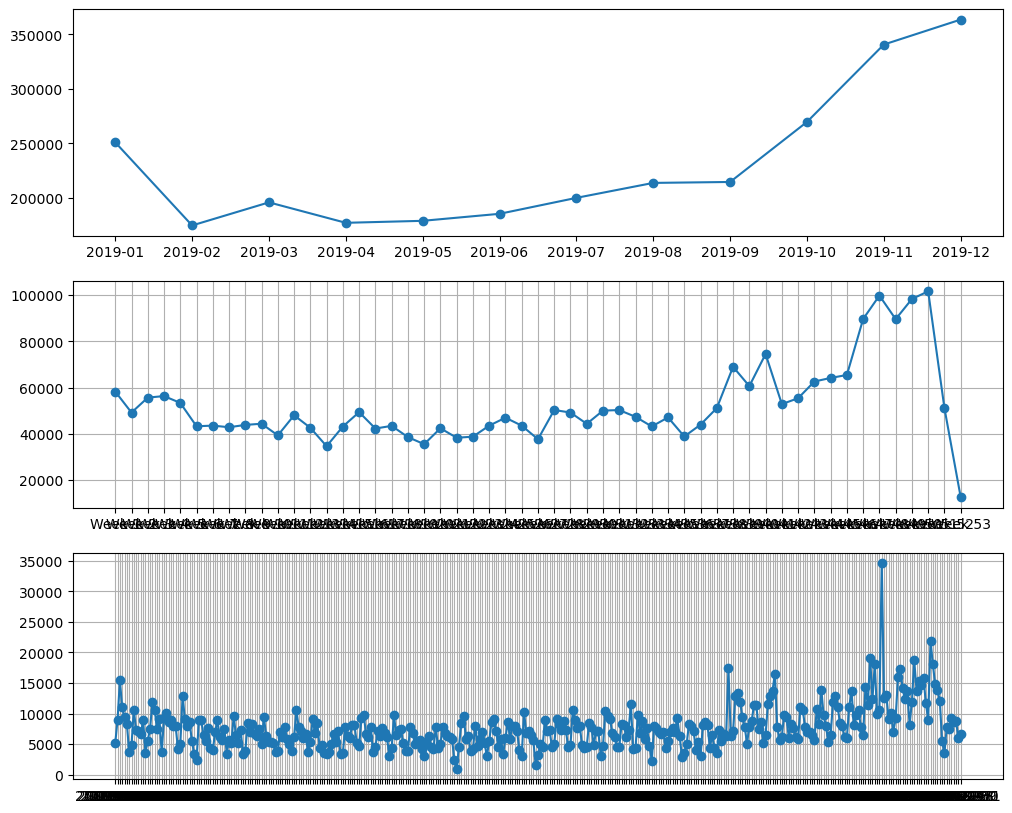

In [125]:
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# Plot monthly revenue
axs[0].plot(monthly_quantity['Transaction_Date'].astype(str), monthly_quantity['Avg_Price'], marker='o', linestyle='-', label='Weekly Revenue')
axs[1].grid(True)

# Plot weekly revenue
axs[1].plot(weekly_quantity['Week'], weekly_quantity['Avg_Price'], marker='o', linestyle='-', label='Weekly Revenue')
axs[1].grid(True)


# Plot daily revenue
axs[2].plot(daily_quantity['Transaction_Date'].astype(str), daily_quantity['Avg_Price'], marker='o', linestyle='-', label='Weekly Revenue')
axs[2].grid(True)

###### 6. Understand the trends/seasonality of sales by category, location, month etc

In [126]:
df.head(3)

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  ... Tenure_Months  \
0         1     153.71               6.5          Used  ...            12   
1         1     153.71               6.5          Used  ...            12   
2         1       2.05               6.5          Used  ...            12   

   GST  Distributed_Offline_Spend  Distributed_Online_Spend  Month  \
0  0.1                  50.561798                 27.241573    Jan   
1  0.1                  50.561798                 27.241573    Jan   
2  0.1                  50.561798                 27.241573    Jan   

   Coupon_Code Discount_pct Invoice_Value  TransactionMonth  revenue  
0       ELEC10         10.0        152.31           2019-01   144.71  
1       ELEC10         10.0        152.31           2019-01   144.71  
2        OFF10         10.0          0.65           2019-01    -6.95  

[3 rows x 22 columns]

In [127]:
df1 = df.loc[:, ['Transaction_Date', 'Location', 'Month', 'Invoice_Value', 'Product_Category']]

In [128]:
df1['Transaction_Date'] = pd.to_datetime(df1['Transaction_Date'])
df1.set_index('Transaction_Date', inplace=True)

In [129]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52924 entries, 2019-01-01 to 2019-12-31
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          52924 non-null  object 
 1   Month             52924 non-null  object 
 2   Invoice_Value     52924 non-null  float64
 3   Product_Category  52924 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


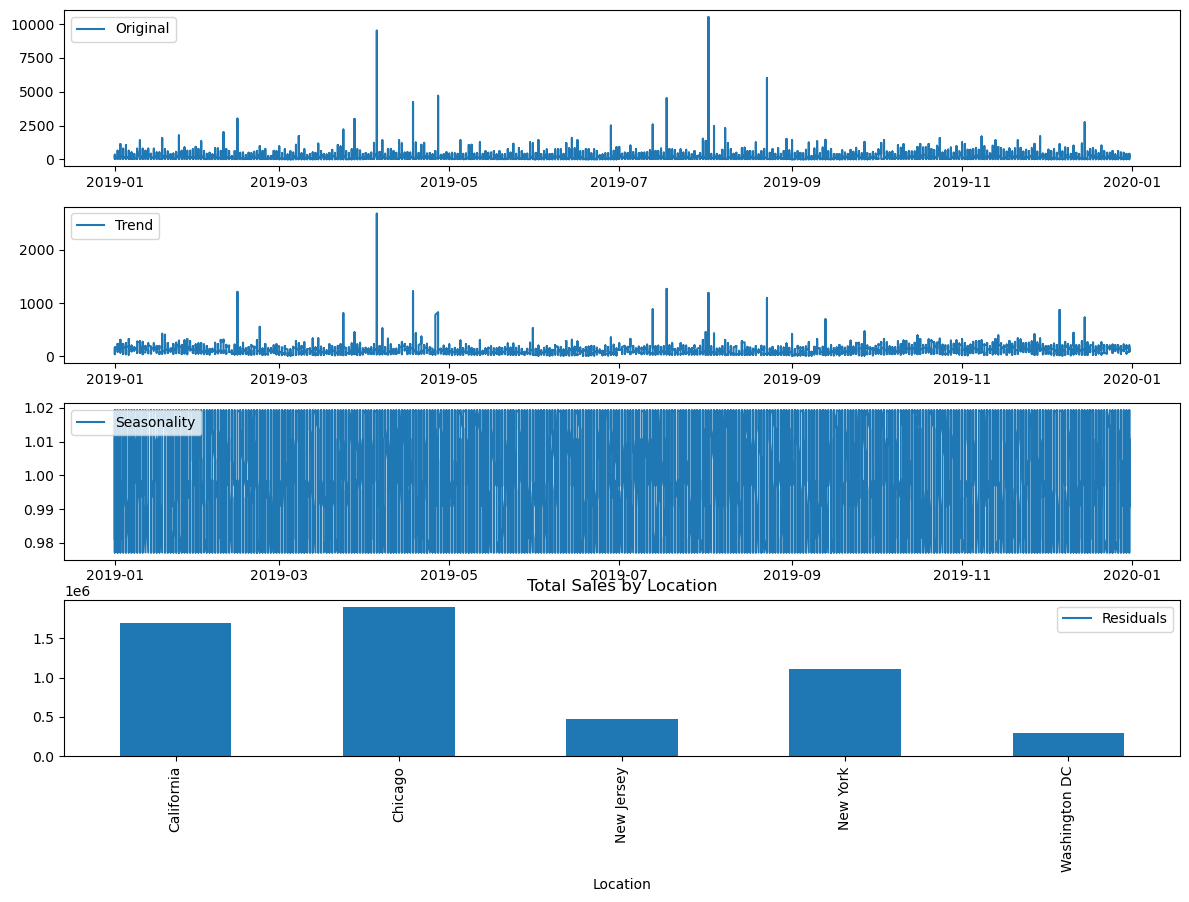

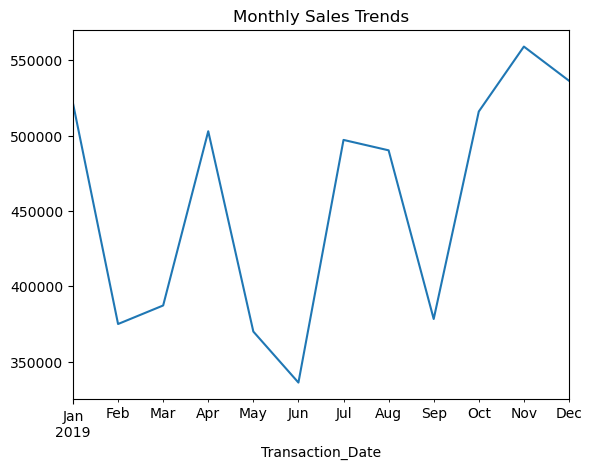

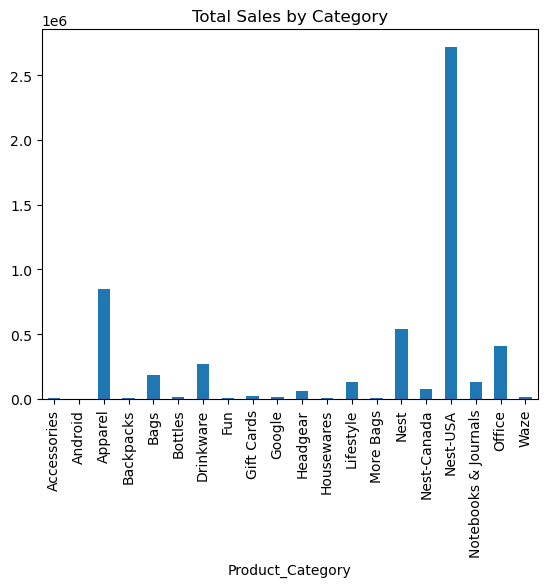

In [130]:
df1['Invoice_Value'] = df1['Invoice_Value'] + abs(df1['Invoice_Value'].min()) + 1

# Perform seasonal decomposition
result = seasonal_decompose(df1['Invoice_Value'], model='multilicative', extrapolate_trend='freq', period=12)

# Visualize decomposition results
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df1['Invoice_Value'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

# Analyze sales by 'Location', 'Month', and 'Category' using groupby and plotting
location_sales = df1.groupby('Location')['Invoice_Value'].sum()
month_sales = df1.resample('M')['Invoice_Value'].sum()
category_sales = df1.groupby('Product_Category')['Invoice_Value'].sum()

# Plot sales by location
location_sales.plot(kind='bar', title='Total Sales by Location')
plt.show()

# Plot sales by month
month_sales.plot(kind='line', title='Monthly Sales Trends')
plt.show()

# Plot sales by category
category_sales.plot(kind='bar', title='Total Sales by Category')
plt.show()

###### 7. How number order varies and sales with different days?

In [131]:
daily_data = df.loc[:, ['Transaction_Date', 'Quantity', 'Invoice_Value']]

In [132]:
daily_data['Day'] = daily_data['Transaction_Date'].dt.day

In [133]:
# Group data by day and calculate daily totals
daily_data = df.groupby(daily_data['Day'])[['Quantity', 'Invoice_Value']].sum()

In [134]:
daily_data.head(3)

Quantity  Invoice_Value
Day                         
1        7178      129965.04
2        7612      131583.07
3        6545      126311.46

In [135]:
# Calculate daily averages
daily_data['Average_Order_Quantity'] = daily_data['Quantity'] / 31
daily_data['Average_Invoice_Value'] = daily_data['Invoice_Value'] / 31

In [136]:
daily_data.to_csv("daily_data.csv", index=False)

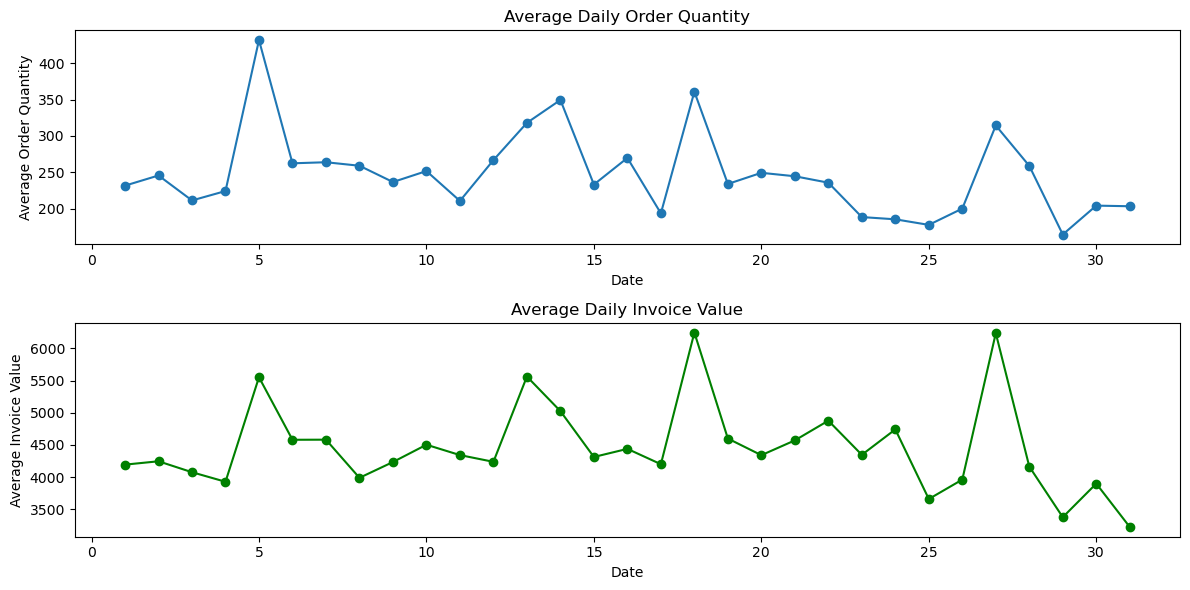

In [143]:
# Create plots to visualize the data
plt.figure(figsize=(12, 6))

# Plot daily order quantity
plt.subplot(2, 1, 1)
plt.plot(daily_data.index, daily_data['Average_Order_Quantity'], marker='o', linestyle='-')
plt.title('Average Daily Order Quantity')
plt.xlabel('Date')
plt.ylabel('Average Order Quantity')

# Plot daily invoice value
plt.subplot(2, 1, 2)
plt.plot(daily_data.index, daily_data['Average_Invoice_Value'], marker='o', linestyle='-', color='green')
plt.title('Average Daily Invoice Value')
plt.xlabel('Date')
plt.ylabel('Average Invoice Value')

plt.tight_layout()
plt.show()

In [144]:
df.head(3)

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  ...  \
0         1     153.71               6.5          Used  ...   
1         1     153.71               6.5          Used  ...   
2         1       2.05               6.5          Used  ...   

  Distributed_Offline_Spend Distributed_Online_Spend  Month  Coupon_Code  \
0                 50.561798                27.241573    Jan       ELEC10   
1                 50.561798                27.241573    Jan       ELEC10   
2                 50.561798                27.241573    Jan        OFF10   

   Discount_pct  Invoice_Value TransactionMonth revenue  marketing_spend  \
0          10.0         152.31          2019-01  144.71        77.803371   
1          10.0         152.31          2019-01  144.71        77.803371   
2          10.0           0.65          2019-01   -6.95        77.803371   

   marketing_pct_revenue  
0                0.53765  
1                0.53765  
2              -11.19473  

[3 rows x 24 columns]

###### 8. Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.

In [145]:
df['marketing_spend'] = df['Distributed_Offline_Spend'] + df['Distributed_Online_Spend']

In [146]:
df['marketing_pct_revenue'] = (df['marketing_spend']/df['revenue'])

In [147]:
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'GST', 'Distributed_Offline_Spend',
       'Distributed_Online_Spend', 'Month', 'Coupon_Code', 'Discount_pct',
       'Invoice_Value', 'TransactionMonth', 'revenue', 'marketing_spend',
       'marketing_pct_revenue'],
      dtype='object')

In [148]:
month_revenue_month = df.loc[:, ['Month', 'revenue']]
month_revenue_month = month_revenue_month.set_index('Month')
marketing_spend_month = df.loc[:, ['Month', 'marketing_spend']]
marketing_spend_month = marketing_spend_month.set_index('Month')
delivery_charges_month = df.loc[:, ['Month', 'Delivery_Charges']]
delivery_charges_month = delivery_charges_month.set_index('Month')
marketing_spend_pct_month = df.loc[:, ['Month', 'marketing_pct_revenue']]
marketing_spend_pct_month = marketing_spend_pct_month.set_index('Month')
tax_month = df.loc[:, ['Month', 'GST']]
tax_month = tax_month.set_index('Month')

<Axes: xlabel='Month'>

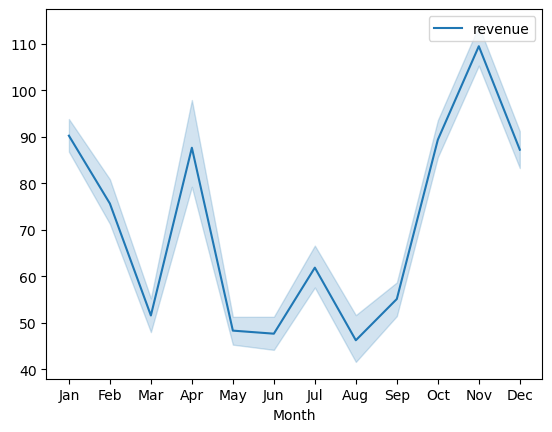

In [149]:
sns.lineplot(month_revenue_month)

<Axes: xlabel='Month'>

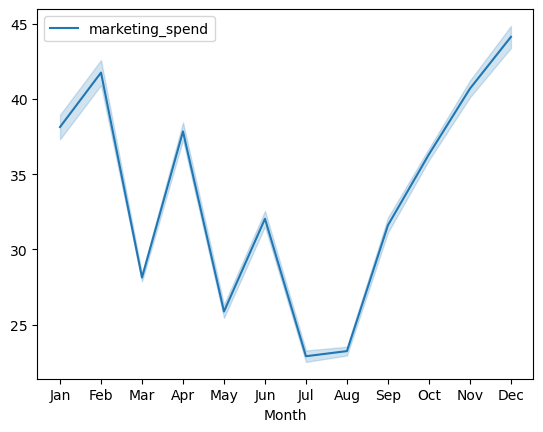

In [150]:
sns.lineplot(marketing_spend_month)

<Axes: xlabel='Month'>

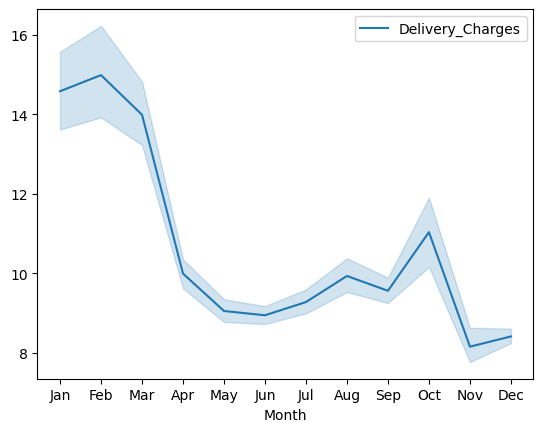

In [151]:
sns.lineplot(delivery_charges_month)

<Axes: xlabel='Month'>

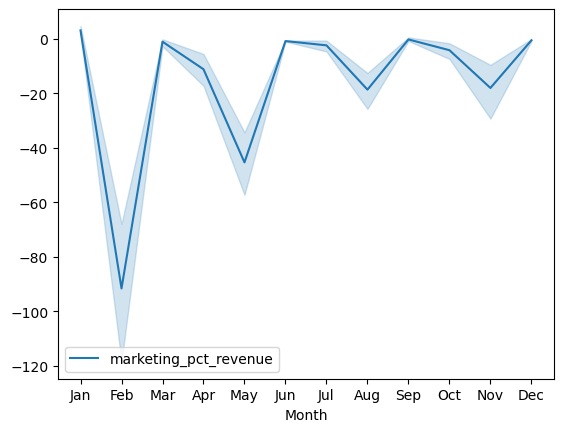

In [152]:
sns.lineplot(marketing_spend_pct_month)

<Axes: xlabel='Month'>

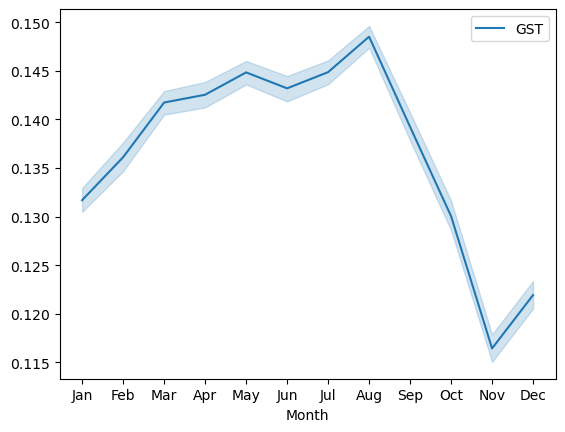

In [153]:
sns.lineplot(tax_month)

###### 9. How marketing spend is impacting on revenue?

In [154]:
marketing_revenue_impct = df.loc[:, ['Month', 'revenue', 'marketing_spend']]
marketing_revenue_impct = marketing_revenue_impct.groupby('Month')[['revenue', 'marketing_spend']].mean()

<Axes: xlabel='Month'>

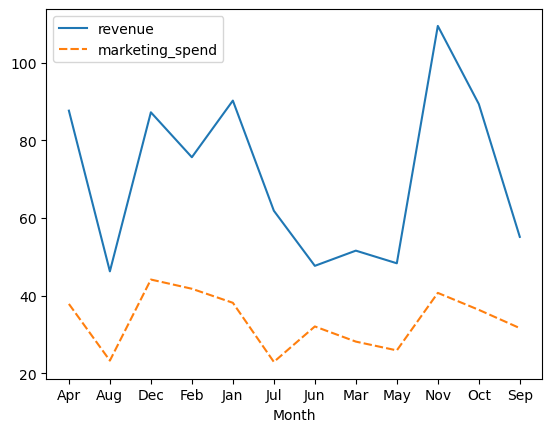

In [155]:
sns.lineplot(marketing_revenue_impct)

In [156]:
marketing_revenue_impct.to_csv("marketing_revenue_impct", index=False)

###### 10. Which product was appeared in the transactions?

In [157]:
unique_products = df['Product_SKU'].unique()
print(unique_products)

['GGOENEBJ079499' 'GGOEGFKQ020399' 'GGOEGAAB010516' ... 'GGOEGDHQ086199'
 'GGOEGDWQ087699' 'GGOEGOCJ093999']


In [158]:
unique_products = df['Product_Description'].unique()
print(unique_products)

['Nest Learning Thermostat 3rd Gen-USA - Stainless Steel'
 'Google Laptop and Cell Phone Stickers'
 "Google Men's 100% Cotton Short Sleeve Hero Tee Black"
 'Google Canvas Tote Natural/Navy' 'Sport Bag' 'Google 22 oz Water Bottle'
 'Google Infuser-Top Water Bottle' 'Engraved Ceramic Google Mug'
 'Maze Pen' 'Galaxy Screen Cleaning Cloth' 'Badge Holder'
 "YouTube Men's Short Sleeve Hero Tee Black"
 'Nest Cam Outdoor Security Camera - USA'
 'Nest Protect Smoke + CO White Wired Alarm-USA'
 "Google Men's 100% Cotton Short Sleeve Hero Tee Red"
 "Google Women's Short Sleeve Hero Tee White" 'Red Shine 15 oz Mug'
 'Compact Selfie Stick' 'Ballpoint LED Light Pen'
 'Color Changing Grip Pen' 'Colored Pencil Set'
 'Spiral Notebook and Pen Set' 'Nest Cam Indoor Security Camera - USA'
 'Android Sticker Sheet Ultra Removable' '23 oz Wide Mouth Sport Bottle'
 'YouTube Custom Decals' 'YouTube Spiral Journal with Pen'
 "Google Women's Quilted Insulated Vest Black"
 'Google 17oz Stainless Steel Sport Bottl

##### 11. Which product was purchased mostly based on the quantity?

In [159]:
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'GST', 'Distributed_Offline_Spend',
       'Distributed_Online_Spend', 'Month', 'Coupon_Code', 'Discount_pct',
       'Invoice_Value', 'TransactionMonth', 'revenue', 'marketing_spend',
       'marketing_pct_revenue'],
      dtype='object')

In [160]:
most_bought_product = df.loc[:, ['Product_SKU', 'Product_Description', 'Quantity']]

In [161]:
most_bought_product = pd.DataFrame(most_bought_product.groupby(['Product_SKU', 'Product_Description'])['Quantity'].sum())

In [162]:
most_bought_product.sort_values('Quantity', ascending=[False], inplace=True)

In [163]:
most_bought_product.reset_index()

Product_SKU                          Product_Description  Quantity
0     GGOEGGOA017399                                     Maze Pen     16234
1     GGOEGDHC018299                    Google 22 oz Water Bottle      9728
2     GGOEGBMJ013399                                    Sport Bag      7321
3     GGOEGOLC014299                 Google Metallic Notebook Set      6496
4     GGOEGFKQ020399        Google Laptop and Cell Phone Stickers      5847
...              ...                                          ...       ...
1140  GGOEGAXR066029            Google Toddler Sports T-shirt Red         1
1141  GGOEGAXT065429   Google Toddler Short Sleeve T-shirt Yellow         1
1142  GGOEGAQJ058715               Google Women's Zip Hoodie Grey         1
1143  GGOEGAEB031513  Google 3/4 Sleeve Raglan Badge Henley Black         1
1144  GGOEGALQ058116          Google Women's Colorblock Tee White         1

[1145 rows x 3 columns]

In [164]:
most_bought_product.iloc[0,]

Quantity    16234
Name: (GGOEGGOA017399, Maze Pen), dtype: int64

In [165]:
most_bought_product.to_csv("most_bought_product.csv", index=False)

### 3. Performing Customer Segmentation

###### 1. Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same.

In [166]:
df['Invoice_Value'].value_counts()

Invoice_Value
 117.10    834
 107.10    813
 147.10    720
 137.10    701
 97.10     557
          ... 
 418.68      1
-2.73        1
-7.88        1
 107.80      1
 314.17      1
Name: count, Length: 9227, dtype: int64

In [167]:
max_date = df['Transaction_Date'].max()
df['Recency'] = (max_date - df['Transaction_Date']).dt.days
df_rfm = df.groupby('CustomerID').agg({
    'Recency': 'min',             # Min recency
    'Transaction_Date': 'count',  # Frequency
    'Invoice_Value': 'sum'        # Monetary
}).reset_index()

In [168]:
df_rfm.rename(columns={'Transaction_Date': 'Frequency', 'Invoice_Value': 'Monetary'}, inplace=True)

In [169]:
# Define quartiles for segmentation
quantiles = df_rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

In [170]:
quantiles

{'CustomerID': {0.25: 13830.5, 0.5: 15300.0, 0.75: 16882.25},
 'Recency': {0.25: 55.0, 0.5: 131.0, 0.75: 220.0},
 'Frequency': {0.25: 10.0, 0.5: 21.0, 0.75: 46.0},
 'Monetary': {0.25: 538.5699999999999, 0.5: 1579.305, 0.75: 3590.775}}

In [171]:
# Function to segment customers

def rfm_segment(row):
    
    r = row['Recency']
    f = row['Frequency']
    m = row['Monetary']
    
    if r <= quantiles['Recency'][0.25]:
        r_label = 4
    elif r <= quantiles['Recency'][0.50]:
        r_label = 3
    elif r <= quantiles['Recency'][0.75]:
        r_label = 2
    else:
        r_label = 1

    if f <= quantiles['Frequency'][0.25]:
        f_label = 4
    elif f <= quantiles['Frequency'][0.50]:
        f_label = 3
    elif f <= quantiles['Frequency'][0.75]:
        f_label = 2
    else:
        f_label = 1

    if m <= quantiles['Monetary'][0.25]:
        m_label = 4
    elif m <= quantiles['Monetary'][0.50]:
        m_label = 3
    elif m <= quantiles['Monetary'][0.75]:
        m_label = 2
    else:
        m_label = 1

    return str(r_label) + str(f_label) + str(m_label)

In [172]:
df_rfm['RFM_Segment'] = df_rfm.apply(rfm_segment, axis=1)

In [173]:
values_to_filter = ['111', '222', '333', '444']
filtered_df = df_rfm[df_rfm['RFM_Segment'].isin(values_to_filter)]

In [174]:
filtered_df

CustomerID  Recency  Frequency  Monetary RFM_Segment
17         12414       17          7    450.57         444
21         12422      102         13    748.39         333
26         12433      265        147  16603.45         111
37         12477       26          2    209.94         444
66         12583      151         42   2569.27         222
...          ...      ...        ...       ...         ...
1416       18061       91         11   1189.92         333
1418       18065      194         22   1654.82         222
1425       18092      124         21   1509.42         333
1441       18161       79         15    745.98         333
1444       18176      172         33   2042.16         222

[157 rows x 5 columns]

#### 2. Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.

In [175]:
X = filtered_df[['CustomerID', 'Frequency', 'Monetary', 'Recency']]

In [176]:
X.shape

(157, 4)

In [177]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [178]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

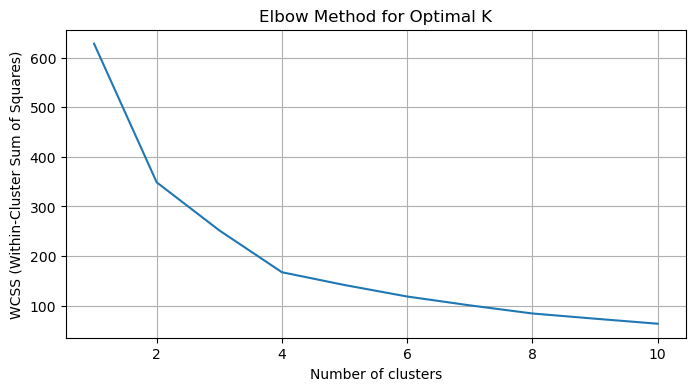

In [179]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [180]:
optimal_k = 3

In [181]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=22)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=22)

In [182]:
filtered_df['Cluster'] = kmeans.labels_

In [183]:
def define_strategy(cluster):
    if cluster == 0:
        return 'High-Value Segment: Implement loyalty programs and premium services.'
    elif cluster == 1:
        return 'Moderate-Value Segment: Offer targeted promotions and incentives.'
    elif cluster == 2:
        return 'Low-Value Segment: Focus on cost-effective retention strategies.'
    else:
        return 'Undefined'

In [184]:
filtered_df['Strategy'] = filtered_df['Cluster'].apply(define_strategy)

In [185]:
filtered_df.tail(10)

CustomerID  Recency  Frequency  Monetary RFM_Segment  Cluster  \
1394       17967      333         48   4210.19         111        1   
1395       17968      359         85   8404.20         111        1   
1398       17976      341         65   5323.71         111        1   
1408       18017       18          1     -1.76         444        0   
1412       18043      275         66   3640.76         111        1   
1416       18061       91         11   1189.92         333        0   
1418       18065      194         22   1654.82         222        0   
1425       18092      124         21   1509.42         333        0   
1441       18161       79         15    745.98         333        0   
1444       18176      172         33   2042.16         222        0   

                                               Strategy  
1394  Moderate-Value Segment: Offer targeted promoti...  
1395  Moderate-Value Segment: Offer targeted promoti...  
1398  Moderate-Value Segment: Offer targeted promoti...  
1408  High-Value Segment: Implement loyalty programs...  
1412  Moderate-Value Segment: Offer targeted promoti...  
1416  High-Value Segment: Implement loyalty programs...  
1418  High-Value Segment: Implement loyalty programs...  
1425  High-Value Segment: Implement loyalty programs...  
1441  High-Value Segment: Implement loyalty programs...  
1444  High-Value Segment: Implement loyalty programs...

In [186]:
filtered_df.to_csv("rfm_filtered_df.csv", index=False)

### 4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)

###### 1. First define dependent variable with categories low value, medium value, high value using customer revenue.

In [187]:
data = df.loc[:, :]

In [188]:
data = pd.DataFrame(data)

# Define the dependent variable (target) based on revenue percentiles
data['CustomerCategory'] = pd.qcut(data['revenue'], q=[0, 0.25, 0.75, 1], labels=['Low Value', 'Medium Value', 'High Value'])

In [189]:
data.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'GST', 'Distributed_Offline_Spend',
       'Distributed_Online_Spend', 'Month', 'Coupon_Code', 'Discount_pct',
       'Invoice_Value', 'TransactionMonth', 'revenue', 'marketing_spend',
       'marketing_pct_revenue', 'Recency', 'CustomerCategory'],
      dtype='object')

In [190]:
data.drop(columns=['CustomerID','Transaction_ID', 'Transaction_Date', 'Product_SKU', 'Product_Category', 'Discount_pct', 'Coupon_Status', 'Coupon_Code', 'TransactionMonth', 'Recency', 'marketing_pct_revenue', 'Location', 'Product_Description', 'Distributed_Offline_Spend', 'Distributed_Online_Spend', 'Delivery_Charges', 'Tenure_Months', 'Month'], inplace=True)

In [191]:
data.columns

Index(['Quantity', 'Avg_Price', 'Gender', 'GST', 'Invoice_Value', 'revenue',
       'marketing_spend', 'CustomerCategory'],
      dtype='object')

In [192]:
data.isnull().sum()

Quantity            0
Avg_Price           0
Gender              0
GST                 0
Invoice_Value       0
revenue             0
marketing_spend     0
CustomerCategory    0
dtype: int64

In [193]:
le = LabelEncoder()

In [194]:
data['CustomerCategory'] = le.fit_transform(data['CustomerCategory'])
data['Gender'] = le.fit_transform(data['Gender'])

In [195]:
data.head(3)

Quantity  Avg_Price  Gender  GST  Invoice_Value  revenue  marketing_spend  \
0         1     153.71       1  0.1         152.31   144.71        77.803371   
1         1     153.71       1  0.1         152.31   144.71        77.803371   
2         1       2.05       1  0.1           0.65    -6.95        77.803371   

   CustomerCategory  
0                 0  
1                 0  
2                 1

In [196]:
#Handling outliers

<Axes: ylabel='Avg_Price'>

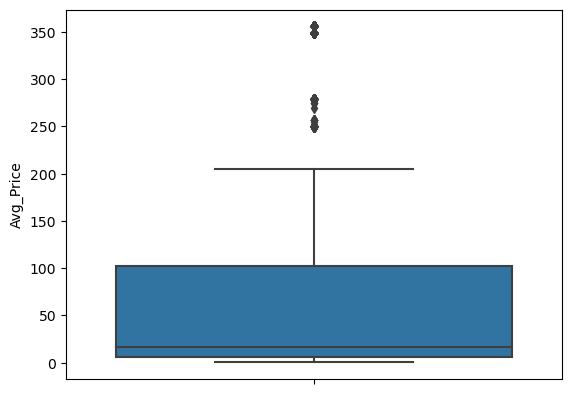

In [197]:
sns.boxplot(y= data['Avg_Price'])

In [198]:
Avg_Price_upperlimit = data['Avg_Price'].mean()+(3*data['Avg_Price'].std())
Avg_Price_lowerlimit = data['Avg_Price'].mean()-(3*data['Avg_Price'].std())

In [199]:
data.Avg_Price.clip(upper=Avg_Price_upperlimit, lower=Avg_Price_lowerlimit, inplace=True)

<Axes: ylabel='Avg_Price'>

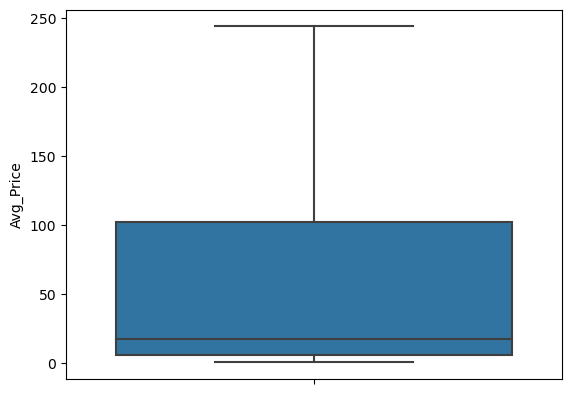

In [200]:
sns.boxplot(y= data['Avg_Price'])

<Axes: ylabel='Invoice_Value'>

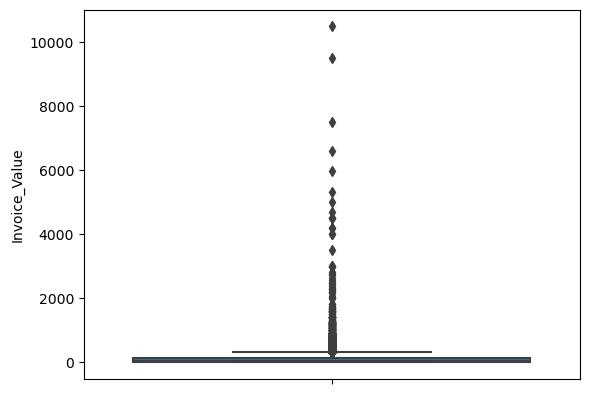

In [201]:
sns.boxplot(y= data['Invoice_Value'])

In [202]:
Invoice_Value_upperlimit = data['Invoice_Value'].mean()+(3*data['Invoice_Value'].std())
Invoice_Value_lowerlimit = data['Invoice_Value'].mean()-(3*data['Invoice_Value'].std())

In [203]:
data.Invoice_Value.clip(upper=Invoice_Value_upperlimit, lower=Invoice_Value_lowerlimit, inplace=True)

<Axes: ylabel='Invoice_Value'>

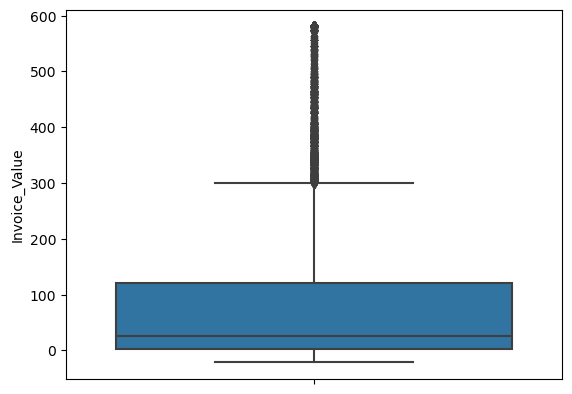

In [204]:
sns.boxplot(y= data['Invoice_Value'])

<Axes: ylabel='revenue'>

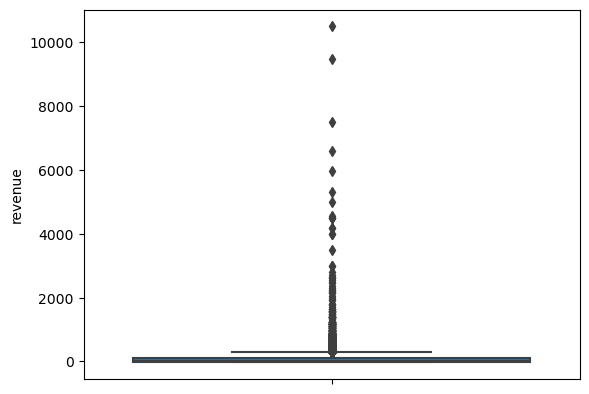

In [205]:
sns.boxplot(y= data['revenue'])

In [206]:
revenue_upperlimit = data['revenue'].mean()+(3*data['revenue'].std())
revenue_lowerlimit = data['revenue'].mean()-(3*data['revenue'].std())
data.revenue.clip(upper=revenue_upperlimit, lower=revenue_lowerlimit, inplace=True)

<Axes: ylabel='revenue'>

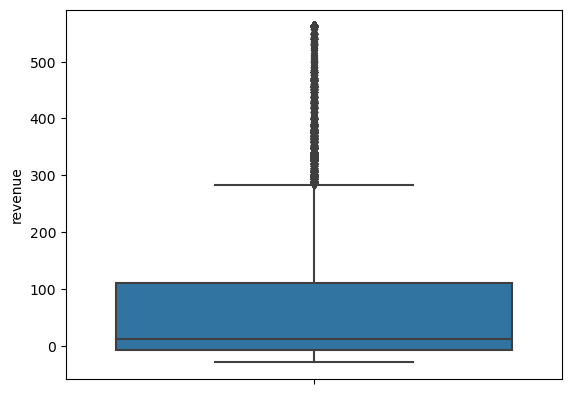

In [207]:
sns.boxplot(y= data['revenue'])

<Axes: ylabel='marketing_spend'>

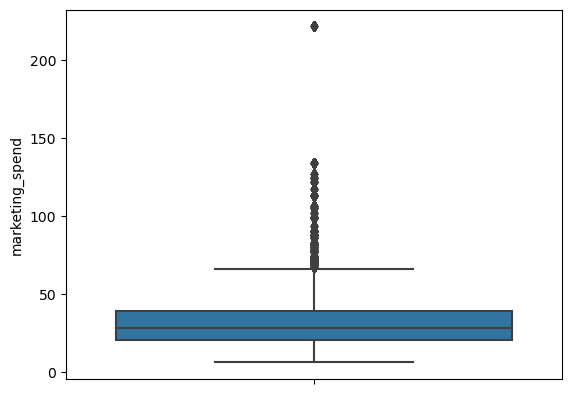

In [208]:
sns.boxplot(y= data['marketing_spend'])

<Axes: ylabel='marketing_spend'>

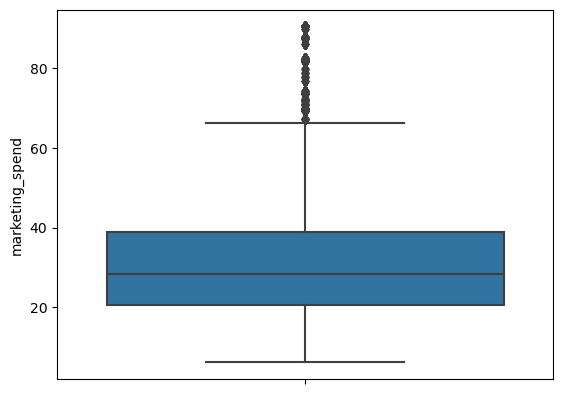

In [209]:
marketing_spend_upperlimit = data['marketing_spend'].mean()+(3*data['marketing_spend'].std())
marketing_spend_lowerlimit = data['revenue'].mean()-(3*data['revenue'].std())
data.marketing_spend.clip(upper=marketing_spend_upperlimit, lower=marketing_spend_lowerlimit, inplace=True)
sns.boxplot(y= data['marketing_spend'])

<Axes: >

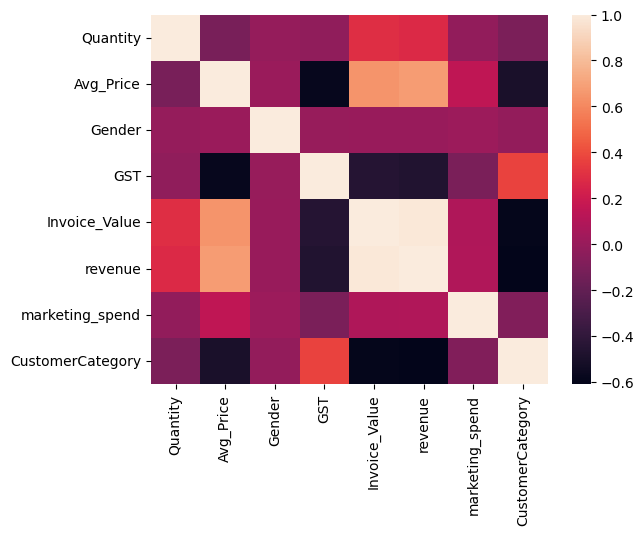

In [210]:
sns.heatmap(data.corr())

<Axes: xlabel='Avg_Price', ylabel='Density'>

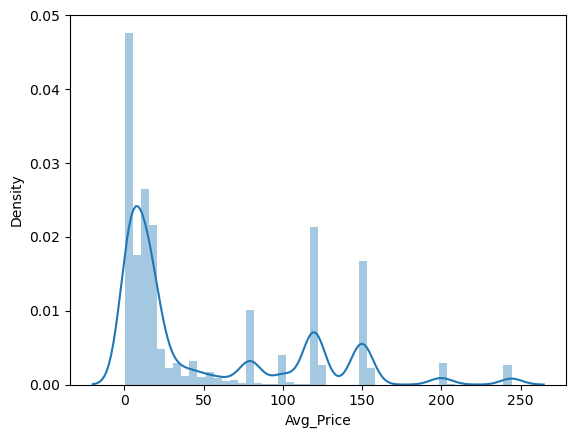

In [211]:
#EDA
sns.distplot(data['Avg_Price'])

<Axes: xlabel='revenue', ylabel='Density'>

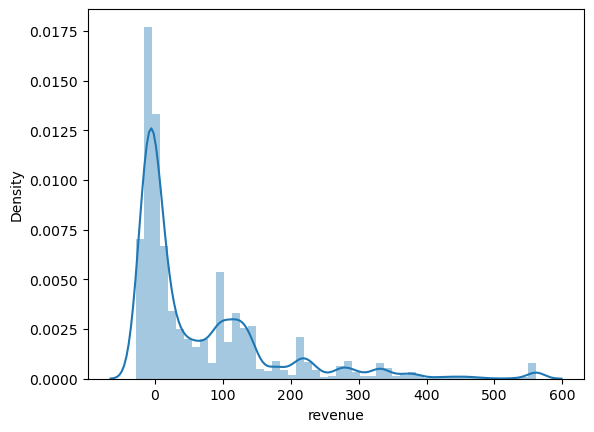

In [212]:
sns.distplot(data['revenue'])

<Axes: xlabel='Invoice_Value', ylabel='Density'>

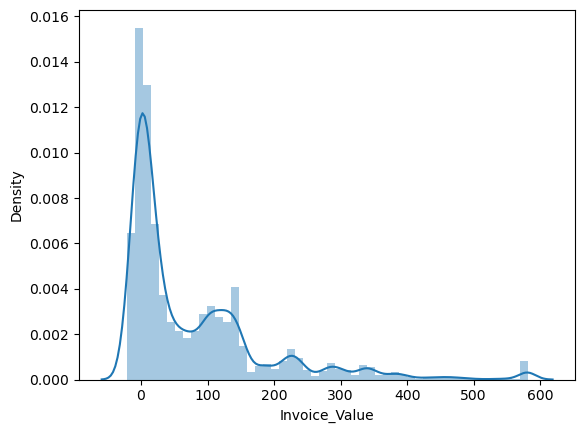

In [213]:
sns.distplot(data['Invoice_Value'])

<Axes: xlabel='marketing_spend', ylabel='Density'>

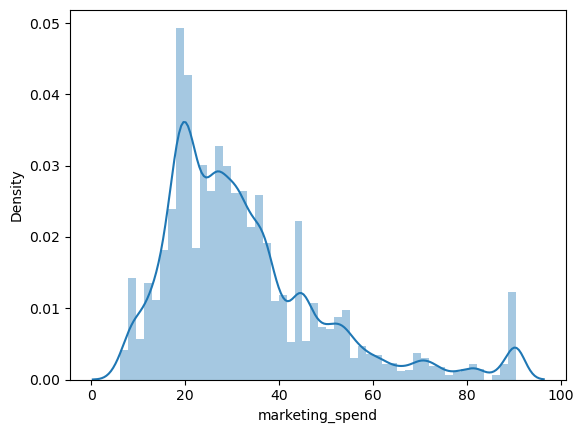

In [214]:
sns.distplot(data['marketing_spend'])

In [215]:
data.columns

Index(['Quantity', 'Avg_Price', 'Gender', 'GST', 'Invoice_Value', 'revenue',
       'marketing_spend', 'CustomerCategory'],
      dtype='object')

In [216]:
X= data.loc[:, ['Quantity', 'Avg_Price', 'Gender', 'GST', 'Invoice_Value', 'revenue', 'marketing_spend']]
Y= data['CustomerCategory']

In [217]:
ss = StandardScaler()

In [218]:
X=ss.fit_transform(X)

In [219]:
X = pd.DataFrame(X, columns=['Quantity', 'Avg_Price', 'Gender', 'GST', 'Invoice_Value', 'revenue', 'marketing_spend'])

In [220]:
X

Quantity  Avg_Price    Gender       GST  Invoice_Value   revenue  \
0     -0.173973   1.720577  1.287333 -0.817509       0.684224  0.733889   
1     -0.173973   1.720577  1.287333 -0.817509       0.684224  0.733889   
2     -0.173973  -0.822995  1.287333 -0.817509      -0.686968 -0.664295   
3      0.024988  -0.563372  1.287333  0.928288       0.087684  0.124869   
4     -0.173973  -0.580646  1.287333  0.928288      -0.555599 -0.531078   
...         ...        ...       ...       ...            ...       ...   
52919 -0.173973   1.177011 -0.776799 -0.817509       0.210373  0.250711   
52920 -0.173973  -0.036913 -0.776799  0.928288      -0.443307 -0.416575   
52921 -0.173973   1.689885 -0.776799 -0.817509       0.486854  0.532634   
52922  0.024988   0.493068 -0.776799 -0.817509       2.753670  2.844073   
52923 -0.024753   0.493068 -0.776799 -0.817509       2.147636  2.101743   

       marketing_spend  
0             2.638818  
1             2.638818  
2             2.638818  
3             2.638818  
4             2.638818  
...                ...  
52919         3.371226  
52920         3.371226  
52921         3.371226  
52922         3.371226  
52923         3.371226  

[52924 rows x 7 columns]

In [221]:
#Split the data into train and test

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.20, random_state=90)

In [222]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((42339, 7), (10585, 7), (42339,), (10585,))

###### 2. Then perform Classification model

In [223]:
# Logistic Regression
lr = LogisticRegression()

In [224]:
lr.fit(xtrain, ytrain)

LogisticRegression()

In [225]:
lr.coef_

array([[ 5.70857978e-01,  4.87516841e-01,  8.49118179e-02,
         4.07481158e-01,  4.21567120e+00,  3.11609855e+01,
        -2.87118810e-03],
       [-9.06100877e-02,  2.35587524e-01, -4.91587305e-02,
        -2.72332511e-01, -3.92601255e+00, -4.11982712e+01,
         3.83529669e-02],
       [-4.80247890e-01, -7.23104364e-01, -3.57530873e-02,
        -1.35148647e-01, -2.89658653e-01,  1.00372857e+01,
        -3.54817788e-02]])

In [226]:
ypredict = lr.predict(xtest)

In [227]:
ypredict

array([2, 2, 2, ..., 1, 0, 2])

In [228]:
accuracy_score(ytest, ypredict)

0.9908360888049126

In [229]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2552
           1       0.99      0.98      0.99      2714
           2       0.99      1.00      0.99      5319

    accuracy                           0.99     10585
   macro avg       0.99      0.99      0.99     10585
weighted avg       0.99      0.99      0.99     10585



In [230]:
# Random Forest
rfc = RandomForestClassifier()

In [231]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [232]:
ypredict =rfc.predict(xtest)

In [233]:
ypredict

array([2, 2, 2, ..., 1, 0, 2])

In [234]:
accuracy_score(ytest, ypredict)

1.0

In [235]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2552
           1       1.00      1.00      1.00      2714
           2       1.00      1.00      1.00      5319

    accuracy                           1.00     10585
   macro avg       1.00      1.00      1.00     10585
weighted avg       1.00      1.00      1.00     10585



### 5. Cross-Selling (Which products are selling together)

##### 1.You can perform exploratory analysis & market basket analysis to understand which of items can be bundled together. 

In [236]:
data1 = df.loc[:, ['Transaction_ID', 'Transaction_Date', 'Product_SKU', 'Product_Description', 'Product_Category', 'Invoice_Value', 'revenue', 'marketing_spend', 'Month']]

In [237]:
data1.shape

(52924, 9)

In [238]:
data1.head()

Transaction_ID Transaction_Date     Product_SKU  \
0           16679       2019-01-01  GGOENEBJ079499   
1           16680       2019-01-01  GGOENEBJ079499   
2           16681       2019-01-01  GGOEGFKQ020399   
3           16682       2019-01-01  GGOEGAAB010516   
4           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Invoice_Value  revenue  marketing_spend Month  
0         152.31   144.71        77.803371   Jan  
1         152.31   144.71        77.803371   Jan  
2           0.65    -6.95        77.803371   Jan  
3          86.33    78.65        77.803371   Jan  
4          15.18     7.50        77.803371   Jan

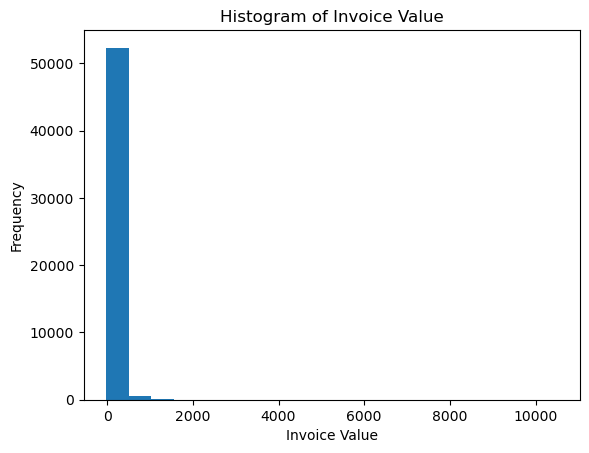

In [239]:
# Histogram of transaction amounts
plt.hist(data1['Invoice_Value'], bins=20)
plt.xlabel('Invoice Value')
plt.ylabel('Frequency')
plt.title('Histogram of Invoice Value')
plt.show()

In [240]:
dff = data1.loc[:, ['Month', 'Product_Category']]

In [241]:
dff.set_index('Month', inplace=True)

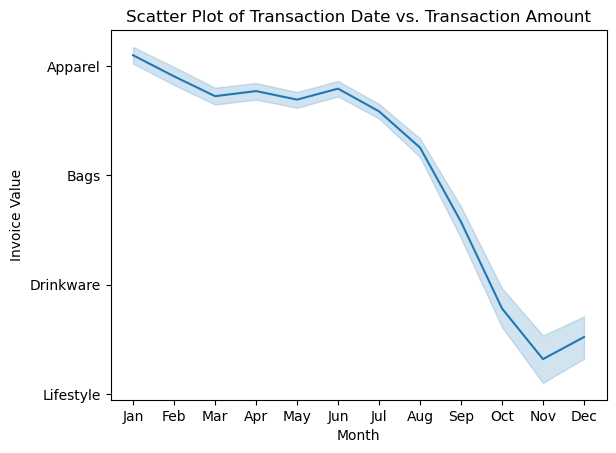

In [242]:
# Scatter plot of Transaction_Date vs. Transaction_Amount
sns.lineplot(dff['Product_Category'])
plt.xlabel('Month')
plt.ylabel('Invoice Value')
plt.title('Scatter Plot of Transaction Date vs. Transaction Amount')
plt.show()

In [243]:
dff.reset_index()

Month Product_Category
0       Jan         Nest-USA
1       Jan         Nest-USA
2       Jan           Office
3       Jan          Apparel
4       Jan             Bags
...     ...              ...
52919   Dec         Nest-USA
52920   Dec          Apparel
52921   Dec         Nest-USA
52922   Dec         Nest-USA
52923   Dec         Nest-USA

[52924 rows x 2 columns]

In [244]:
dff.reset_index()

Month Product_Category
0       Jan         Nest-USA
1       Jan         Nest-USA
2       Jan           Office
3       Jan          Apparel
4       Jan             Bags
...     ...              ...
52919   Dec         Nest-USA
52920   Dec          Apparel
52921   Dec         Nest-USA
52922   Dec         Nest-USA
52923   Dec         Nest-USA

[52924 rows x 2 columns]

In [245]:
dff['Product_Category'].value_counts()

Product_Category
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Fun                       160
Gift Cards                159
Housewares                122
Google                    105
Backpacks                  89
More Bags                  46
Android                    43
Name: count, dtype: int64

In [246]:
data2 = df.loc[:, ['Month', 'Product_SKU', 'Product_Description']]

In [247]:
data2

Month     Product_SKU                                Product_Description
0       Jan  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...
1       Jan  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...
2       Jan  GGOEGFKQ020399              Google Laptop and Cell Phone Stickers
3       Jan  GGOEGAAB010516  Google Men's 100% Cotton Short Sleeve Hero Tee...
4       Jan  GGOEGBJL013999                    Google Canvas Tote Natural/Navy
...     ...             ...                                                ...
52919   Dec  GGOENEBB078899              Nest Cam Indoor Security Camera - USA
52920   Dec  GGOEGAEB091117                            Google Zip Hoodie Black
52921   Dec  GGOENEBQ084699       Nest Learning Thermostat 3rd Gen-USA - White
52922   Dec  GGOENEBQ079199      Nest Protect Smoke + CO White Wired Alarm-USA
52923   Dec  GGOENEBQ079099    Nest Protect Smoke + CO White Battery Alarm-USA

[52924 rows x 3 columns]

In [248]:
pivot_df = df.groupby(['Month', 'Product_SKU'])['Product_Description'].apply(lambda x: ' '.join(str(i) for i in x)).unstack(fill_value='')

In [249]:
pivot_df = pivot_df.T

In [250]:
pivot_df

Month                                                         Apr  \
Product_SKU                                                         
GGOEA0CH077599                                                      
GGOEAAAB034813                    Android BTTF Cosmos Graphic Tee   
GGOEAAAB034814                    Android BTTF Cosmos Graphic Tee   
GGOEAAAB034815                    Android BTTF Cosmos Graphic Tee   
GGOEAAAB034816                    Android BTTF Cosmos Graphic Tee   
...                                                           ...   
GGOEYOCR077399  YouTube RFID Journal YouTube RFID Journal YouT...   
GGOEYOCR077799  YouTube Hard Cover Journal YouTube Hard Cover ...   
GGOEYOCR078099  YouTube Spiral Journal with Pen YouTube Spiral...   
GGOEYOLR018699  YouTube Leatherette Notebook Combo YouTube Lea...   
GGOEYOLR080599  YouTube Notebook and Pen Set YouTube Notebook ...   

Month                                                         Aug  \
Product_SKU                                                         
GGOEA0CH077599  Android Hard Cover Journal Android Hard Cover ...   
GGOEAAAB034813                    Android BTTF Cosmos Graphic Tee   
GGOEAAAB034814  Android BTTF Cosmos Graphic Tee Android BTTF C...   
GGOEAAAB034815                    Android BTTF Cosmos Graphic Tee   
GGOEAAAB034816  Android BTTF Cosmos Graphic Tee Android BTTF C...   
...                                                           ...   
GGOEYOCR077399  YouTube RFID Journal YouTube RFID Journal YouT...   
GGOEYOCR077799  YouTube Hard Cover Journal YouTube Hard Cover ...   
GGOEYOCR078099                                                      
GGOEYOLR018699  YouTube Leatherette Notebook Combo YouTube Lea...   
GGOEYOLR080599                                                      

Month                                                         Dec  \
Product_SKU                                                         
GGOEA0CH077599                                                      
GGOEAAAB034813  Android BTTF Cosmos Graphic Tee Android BTTF C...   
GGOEAAAB034814  Android BTTF Cosmos Graphic Tee Android BTTF C...   
GGOEAAAB034815                                                      
GGOEAAAB034816                                                      
...                                                           ...   
GGOEYOCR077399                                                      
GGOEYOCR077799                                                      
GGOEYOCR078099                                                      
GGOEYOLR018699                                                      
GGOEYOLR080599                                                      

Month                                                         Feb  \
Product_SKU                                                         
GGOEA0CH077599  Android Hard Cover Journal Android Hard Cover ...   
GGOEAAAB034813                                                      
GGOEAAAB034814                    Android BTTF Cosmos Graphic Tee   
GGOEAAAB034815                    Android BTTF Cosmos Graphic Tee   
GGOEAAAB034816                                                      
...                                                           ...   
GGOEYOCR077399                               YouTube RFID Journal   
GGOEYOCR077799  YouTube Hard Cover Journal YouTube Hard Cover ...   
GGOEYOCR078099  YouTube Spiral Journal with Pen YouTube Spiral...   
GGOEYOLR018699  YouTube Leatherette Notebook Combo YouTube Lea...   
GGOEYOLR080599  YouTube Notebook and Pen Set YouTube Notebook ...   

Month                                                         Jan  \
Product_SKU                                                         
GGOEA0CH077599                         Android Hard Cover Journal   
GGOEAAAB034813                                                      
GGOEAAAB034814                                                      
GGOEAAAB034815  Android BTTF Cosmos Graphic Tee Android BTTF C.

In [251]:
pivot_df = pivot_df.applymap(lambda x: 'nan' if x.strip() == '' else x)

In [252]:
pivot_df

Month                                                         Apr  \
Product_SKU                                                         
GGOEA0CH077599                                                nan   
GGOEAAAB034813                    Android BTTF Cosmos Graphic Tee   
GGOEAAAB034814                    Android BTTF Cosmos Graphic Tee   
GGOEAAAB034815                    Android BTTF Cosmos Graphic Tee   
GGOEAAAB034816                    Android BTTF Cosmos Graphic Tee   
...                                                           ...   
GGOEYOCR077399  YouTube RFID Journal YouTube RFID Journal YouT...   
GGOEYOCR077799  YouTube Hard Cover Journal YouTube Hard Cover ...   
GGOEYOCR078099  YouTube Spiral Journal with Pen YouTube Spiral...   
GGOEYOLR018699  YouTube Leatherette Notebook Combo YouTube Lea...   
GGOEYOLR080599  YouTube Notebook and Pen Set YouTube Notebook ...   

Month                                                         Aug  \
Product_SKU                                                         
GGOEA0CH077599  Android Hard Cover Journal Android Hard Cover ...   
GGOEAAAB034813                    Android BTTF Cosmos Graphic Tee   
GGOEAAAB034814  Android BTTF Cosmos Graphic Tee Android BTTF C...   
GGOEAAAB034815                    Android BTTF Cosmos Graphic Tee   
GGOEAAAB034816  Android BTTF Cosmos Graphic Tee Android BTTF C...   
...                                                           ...   
GGOEYOCR077399  YouTube RFID Journal YouTube RFID Journal YouT...   
GGOEYOCR077799  YouTube Hard Cover Journal YouTube Hard Cover ...   
GGOEYOCR078099                                                nan   
GGOEYOLR018699  YouTube Leatherette Notebook Combo YouTube Lea...   
GGOEYOLR080599                                                nan   

Month                                                         Dec  \
Product_SKU                                                         
GGOEA0CH077599                                                nan   
GGOEAAAB034813  Android BTTF Cosmos Graphic Tee Android BTTF C...   
GGOEAAAB034814  Android BTTF Cosmos Graphic Tee Android BTTF C...   
GGOEAAAB034815                                                nan   
GGOEAAAB034816                                                nan   
...                                                           ...   
GGOEYOCR077399                                                nan   
GGOEYOCR077799                                                nan   
GGOEYOCR078099                                                nan   
GGOEYOLR018699                                                nan   
GGOEYOLR080599                                                nan   

Month                                                         Feb  \
Product_SKU                                                         
GGOEA0CH077599  Android Hard Cover Journal Android Hard Cover ...   
GGOEAAAB034813                                                nan   
GGOEAAAB034814                    Android BTTF Cosmos Graphic Tee   
GGOEAAAB034815                    Android BTTF Cosmos Graphic Tee   
GGOEAAAB034816                                                nan   
...                                                           ...   
GGOEYOCR077399                               YouTube RFID Journal   
GGOEYOCR077799  YouTube Hard Cover Journal YouTube Hard Cover ...   
GGOEYOCR078099  YouTube Spiral Journal with Pen YouTube Spiral...   
GGOEYOLR018699  YouTube Leatherette Notebook Combo YouTube Lea...   
GGOEYOLR080599  YouTube Notebook and Pen Set YouTube Notebook ...   

Month                                                         Jan  \
Product_SKU                                                         
GGOEA0CH077599                         Android Hard Cover Journal   
GGOEAAAB034813                                                nan   
GGOEAAAB034814                                                nan   
GGOEAAAB034815  Android BTTF Cosmos Graphic Tee Android BTTF C.

In [253]:
records=[]
for i in range(0,1145):
  #  l = [str(data.values[i,j]) for j in range(0,20)]

    l = []
    for j in range(0,12):
        d = str(pivot_df.values[i,j])
        if (d !='nan'):
            l.append(d)
        
    records.append(l)

In [254]:
records

[['Android Hard Cover Journal Android Hard Cover Journal',
  'Android Hard Cover Journal Android Hard Cover Journal',
  'Android Hard Cover Journal',
  'Android Hard Cover Journal Android Hard Cover Journal Android Hard Cover Journal',
  'Android Hard Cover Journal Android Hard Cover Journal Android Hard Cover Journal Android Hard Cover Journal Android Hard Cover Journal Android Hard Cover Journal Android Hard Cover Journal Android Hard Cover Journal'],
 ['Android BTTF Cosmos Graphic Tee',
  'Android BTTF Cosmos Graphic Tee',
  'Android BTTF Cosmos Graphic Tee Android BTTF Cosmos Graphic Tee Android BTTF Cosmos Graphic Tee Android BTTF Cosmos Graphic Tee',
  'Android BTTF Cosmos Graphic Tee',
  'Android BTTF Cosmos Graphic Tee',
  'Android BTTF Cosmos Graphic Tee Android BTTF Cosmos Graphic Tee Android BTTF Cosmos Graphic Tee',
  'Android BTTF Cosmos Graphic Tee Android BTTF Cosmos Graphic Tee',
  'Android BTTF Cosmos Graphic Tee Android BTTF Cosmos Graphic Tee',
  'Android BTTF Cosmos

In [255]:
patterns = apriori(records,min_support=0.0045, min_confidence= 0.10, min_lift= 1.2, min_length=2)

In [256]:
patterns = list(patterns)

In [257]:
patterns

[RelationRecord(items=frozenset({"Google Men's Short Sleeve Performance Badge Tee Black", "Google Men's Short Sleeve Performance Badge Tee Black Google Men's Short Sleeve Performance Badge Tee Black"}), support=0.005240174672489083, ordered_statistics=[OrderedStatistic(items_base=frozenset({"Google Men's Short Sleeve Performance Badge Tee Black"}), items_add=frozenset({"Google Men's Short Sleeve Performance Badge Tee Black Google Men's Short Sleeve Performance Badge Tee Black"}), confidence=1.0, lift=190.83333333333334), OrderedStatistic(items_base=frozenset({"Google Men's Short Sleeve Performance Badge Tee Black Google Men's Short Sleeve Performance Badge Tee Black"}), items_add=frozenset({"Google Men's Short Sleeve Performance Badge Tee Black"}), confidence=1.0, lift=190.83333333333334)]),
 RelationRecord(items=frozenset({"Google Men's Watershed Full Zip Hoodie Grey", "Google Men's Watershed Full Zip Hoodie Grey Google Men's Watershed Full Zip Hoodie Grey Google Men's Watershed Full 

In [258]:
patterns[0][1]

0.005240174672489083

In [261]:
paired_items = []

for item in patterns:
    main_item = item[0]
   
    pair_items = [x for x in main_item]
    paired_items.append(pair_items)
    print(pair_items[0],'---> ',pair_items[1])
    print('Support ', str(item[1]))
    print('Lift', str(item[-1]))

Google Men's Short Sleeve Performance Badge Tee Black --->  Google Men's Short Sleeve Performance Badge Tee Black Google Men's Short Sleeve Performance Badge Tee Black
Support  0.005240174672489083
Lift [OrderedStatistic(items_base=frozenset({"Google Men's Short Sleeve Performance Badge Tee Black"}), items_add=frozenset({"Google Men's Short Sleeve Performance Badge Tee Black Google Men's Short Sleeve Performance Badge Tee Black"}), confidence=1.0, lift=190.83333333333334), OrderedStatistic(items_base=frozenset({"Google Men's Short Sleeve Performance Badge Tee Black Google Men's Short Sleeve Performance Badge Tee Black"}), items_add=frozenset({"Google Men's Short Sleeve Performance Badge Tee Black"}), confidence=1.0, lift=190.83333333333334)]
Google Men's Watershed Full Zip Hoodie Grey --->  Google Men's Watershed Full Zip Hoodie Grey Google Men's Watershed Full Zip Hoodie Grey Google Men's Watershed Full Zip Hoodie Grey Google Men's Watershed Full Zip Hoodie Grey
Support  0.00524017467

In [263]:
paired_items = pd.DataFrame(paired_items)

In [265]:
paired_items.rename(columns={0:'First_item', 1:'Second_item'}, inplace=True)

In [267]:
paired_items.to_csv('paired_items.csv', index=False)

### 6. Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60 days, 60-90 days, 90+ days)

###### 1. For this, we need create dependent variable at customer level (average days per one transaction for only repeat customers and divide into groups 0-30 days, 30-60 days, 60-90 days and 90+ days) then build classification model to predict next purchase of given customer.

In [268]:
df2 = df.sort_values(by=['CustomerID', 'Transaction_Date'])
df2['CustomerCategory'] = pd.qcut(data['revenue'], q=[0, 0.25, 0.75, 1], labels=['Low Value', 'Medium Value', 'High Value'])
df2['TimeDiff'] = df2.groupby('CustomerID')['Transaction_Date'].diff()
average_days_between_purchases = df2.groupby('CustomerID')['TimeDiff'].mean()
average_days_between_purchases = pd.DataFrame(average_days_between_purchases)

In [269]:
average_days_between_purchases['TimeDiff'] = average_days_between_purchases['TimeDiff'].dt.days

In [270]:
df2 = pd.merge(df2, average_days_between_purchases, on='CustomerID', how='left')

In [271]:
df2.rename(columns={'TimeDiff_y':'AverageDaysPurchase'}, inplace=True)

In [272]:
df2['NextDayPurchase'] = df2['AverageDaysPurchase'] + 1

In [273]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   CustomerID                 52924 non-null  int64          
 1   Transaction_ID             52924 non-null  int64          
 2   Transaction_Date           52924 non-null  datetime64[ns] 
 3   Product_SKU                52924 non-null  object         
 4   Product_Description        52924 non-null  object         
 5   Product_Category           52924 non-null  object         
 6   Quantity                   52924 non-null  int64          
 7   Avg_Price                  52924 non-null  float64        
 8   Delivery_Charges           52924 non-null  float64        
 9   Coupon_Status              52924 non-null  object         
 10  Gender                     52924 non-null  object         
 11  Location                   52924 non-null  object     

In [274]:
df2['NextDayPurchase'].isna().sum()

66

In [275]:
df2['NextDayPurchase'] = df2['NextDayPurchase'].fillna(df2.NextDayPurchase.mode()[0])

In [276]:
df2['NextDayPurchase'] = df2['NextDayPurchase'].astype(int)

In [277]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   CustomerID                 52924 non-null  int64          
 1   Transaction_ID             52924 non-null  int64          
 2   Transaction_Date           52924 non-null  datetime64[ns] 
 3   Product_SKU                52924 non-null  object         
 4   Product_Description        52924 non-null  object         
 5   Product_Category           52924 non-null  object         
 6   Quantity                   52924 non-null  int64          
 7   Avg_Price                  52924 non-null  float64        
 8   Delivery_Charges           52924 non-null  float64        
 9   Coupon_Status              52924 non-null  object         
 10  Gender                     52924 non-null  object         
 11  Location                   52924 non-null  object     

In [278]:
bins = [0, 30, 60, 90, np.inf]
labels = ['0-30 days', '30-60 days', '60-90 days', '90+ days']
df2['NextPurchaseCategory'] = pd.cut(df2['NextDayPurchase'], bins=bins, labels=labels)

In [279]:
df2 = df2.drop(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU', 'Product_Description', 'NextDayPurchase', 'Coupon_Status', 'Location', 'TransactionMonth', 'TimeDiff_x', 'Coupon_Code', 'marketing_pct_revenue', 'Distributed_Offline_Spend', 'Distributed_Online_Spend'], axis=1)

In [280]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Product_Category      52924 non-null  object  
 1   Quantity              52924 non-null  int64   
 2   Avg_Price             52924 non-null  float64 
 3   Delivery_Charges      52924 non-null  float64 
 4   Gender                52924 non-null  object  
 5   Tenure_Months         52924 non-null  int64   
 6   GST                   52924 non-null  float64 
 7   Month                 52924 non-null  object  
 8   Discount_pct          52924 non-null  float64 
 9   Invoice_Value         52924 non-null  float64 
 10  revenue               52924 non-null  float64 
 11  marketing_spend       52924 non-null  float64 
 12  Recency               52924 non-null  int64   
 13  CustomerCategory      52924 non-null  category
 14  AverageDaysPurchase   52858 non-null  float64 
 15  Ne

In [281]:
df2['NextPurchaseCategory']

0        0-30 days
1        0-30 days
2        0-30 days
3        0-30 days
4        0-30 days
           ...    
52919    0-30 days
52920    0-30 days
52921    0-30 days
52922    0-30 days
52923    0-30 days
Name: NextPurchaseCategory, Length: 52924, dtype: category
Categories (4, object): ['0-30 days' < '30-60 days' < '60-90 days' < '90+ days']

In [282]:
le = LabelEncoder()

In [283]:
df2['Product_Category'] = le.fit_transform(df2['Product_Category'])
df2['CustomerCategory'] = le.fit_transform(df2['CustomerCategory'])
df2['Gender'] = le.fit_transform(df2['Gender'])
df2['Month'] = le.fit_transform(df2['Month'])

In [284]:
df2.isna().sum()

Product_Category         0
Quantity                 0
Avg_Price                0
Delivery_Charges         0
Gender                   0
Tenure_Months            0
GST                      0
Month                    0
Discount_pct             0
Invoice_Value            0
revenue                  0
marketing_spend          0
Recency                  0
CustomerCategory         0
AverageDaysPurchase     66
NextPurchaseCategory     0
dtype: int64

In [285]:
df2['AverageDaysPurchase'] = df2['AverageDaysPurchase'].fillna(df2.AverageDaysPurchase.mode()[0])

In [286]:
df2.head(10)

Product_Category  Quantity  Avg_Price  Delivery_Charges  Gender  \
0                 2         1      19.99             75.00       0   
1                18         2       5.50             75.00       0   
2                18         1       2.99             14.41       1   
3                18         1       9.99             14.41       1   
4                16         1     149.00              6.50       1   
5                16         5      79.00              6.50       1   
6                 4         4       4.99             49.73       1   
7                18        10       1.50             49.73       1   
8                 6         4       1.99             49.73       1   
9                10         2      18.99             49.73       1   

   Tenure_Months   GST  Month  Discount_pct  Invoice_Value  revenue  \
0             31  0.18     11          30.0          67.17    -9.01   
1             31  0.10     11          30.0          58.10   -18.00   
2             20  0.10      7          30.0         -10.50   -26.01   
3             20  0.10      7          30.0          -3.50   -19.01   
4             20  0.10      7          30.0         127.60   120.00   
5             20  0.10      7          30.0         373.60   366.00   
6             20  0.18      7          30.0          41.87    -9.04   
7             20  0.10      7          30.0          36.83   -14.00   
8             20  0.18      7          30.0          29.87   -21.04   
9             20  0.05      7          30.0          59.76     8.98   

   marketing_spend  Recency  CustomerCategory  AverageDaysPurchase  \
0        32.436667      107                 1                  0.0   
1        32.436667      107                 1                  0.0   
2        30.181818      282                 1                  3.0   
3        30.181818      282                 1                  3.0   
4        30.181818      282                 0                  3.0   
5        30.181818      282                 0                  3.0   
6        30.181818      282                 1                  3.0   
7        30.181818      282                 1                  3.0   
8        30.181818      282                 1                  3.0   
9        30.181818      282                 2                  3.0   

  NextPurchaseCategory  
0            0-30 days  
1            0-30 days  
2            0-30 days  
3            0-30 days  
4            0-30 days  
5            0-30 days  
6            0-30 days  
7            0-30 days  
8            0-30 days  
9            0-30 days

In [287]:
# Split the data into training and testing sets
X = df2.drop('NextPurchaseCategory', axis=1)
y = df2['NextPurchaseCategory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier (you can choose a different classifier)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   0-30 days       1.00      1.00      1.00     10567
  30-60 days       0.65      1.00      0.79        11
  60-90 days       1.00      0.50      0.67         2
    90+ days       0.00      0.00      0.00         5

    accuracy                           1.00     10585
   macro avg       0.66      0.62      0.61     10585
weighted avg       1.00      1.00      1.00     10585



In [289]:
df2.to_csv("Next_Purchase_Day_csv", index=False)

### 7. Perform cohort analysis by defining below cohorts

##### 1. Customers who started in each month and understand their behaviour

In [290]:
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'GST', 'Distributed_Offline_Spend',
       'Distributed_Online_Spend', 'Month', 'Coupon_Code', 'Discount_pct',
       'Invoice_Value', 'TransactionMonth', 'revenue', 'marketing_spend',
       'marketing_pct_revenue', 'Recency'],
      dtype='object')

In [291]:
cohorts = df.groupby(['TransactionMonth', 'CustomerID']).agg({
    'Recency': 'min',
}).reset_index()

In [292]:
cohorts['CohortMonth'] = cohorts['TransactionMonth']

In [293]:
cohorts['CohortMonth'] = cohorts.groupby('CustomerID')['TransactionMonth'].transform('min')
cohorts['CohortIndex'] = (cohorts['TransactionMonth'].dt.year - cohorts['CohortMonth'].dt.year) * 12 + (cohorts['TransactionMonth'].dt.month - cohorts['CohortMonth'].dt.month) + 1

In [294]:
cohorts

TransactionMonth  CustomerID  Recency CohortMonth  CohortIndex
0             2019-01       12431      362     2019-01            1
1             2019-01       12433      355     2019-01            1
2             2019-01       12471      347     2019-01            1
3             2019-01       12472      354     2019-01            1
4             2019-01       12583      364     2019-01            1
...               ...         ...      ...         ...          ...
2573          2019-12       18055       26     2019-02           11
2574          2019-12       18178       12     2019-04            9
2575          2019-12       18198       20     2019-08            5
2576          2019-12       18202       23     2019-12            1
2577          2019-12       18250       18     2019-12            1

[2578 rows x 5 columns]

In [295]:
cohort_counts = cohorts.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

In [296]:
cohort_counts

CohortMonth  CohortIndex  CustomerID
0      2019-01            1         215
1      2019-01            2          13
2      2019-01            3          24
3      2019-01            4          34
4      2019-01            5          23
..         ...          ...         ...
73     2019-10            2           6
74     2019-10            3           4
75     2019-11            1          68
76     2019-11            2           7
77     2019-12            1         106

[78 rows x 3 columns]

In [297]:
cohort_sizes = cohort_counts.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

In [298]:
cohort_sizes

CohortIndex     1     2     3     4     5     6     7     8     9     10  \
CohortMonth                                                                
2019-01      215.0  13.0  24.0  34.0  23.0  44.0  35.0  47.0  23.0  28.0   
2019-02       96.0   7.0   9.0  16.0  17.0  22.0  19.0  15.0  12.0  11.0   
2019-03      177.0  18.0  35.0  25.0  32.0  33.0  22.0  22.0  15.0  19.0   
2019-04      163.0  14.0  24.0  24.0  18.0  15.0  10.0  16.0  12.0   NaN   
2019-05      112.0  12.0   9.0  13.0  10.0  13.0  14.0   8.0   NaN   NaN   
2019-06      137.0  20.0  22.0  12.0  11.0  14.0  11.0   NaN   NaN   NaN   
2019-07       94.0  13.0   4.0   6.0  11.0   9.0   NaN   NaN   NaN   NaN   
2019-08      135.0  14.0  15.0  10.0   8.0   NaN   NaN   NaN   NaN   NaN   
2019-09       78.0   6.0   3.0   2.0   NaN   NaN   NaN   NaN   NaN   NaN   
2019-10       87.0   6.0   4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-11       68.0   7.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-12      106.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

CohortIndex    11    12  
CohortMonth              
2019-01      20.0  34.0  
2019-02      16.0   NaN  
2019-03       NaN   NaN  
2019-04       NaN   NaN  
2019-05       NaN   NaN  
2019-06       NaN   NaN  
2019-07       NaN   NaN  
2019-08       NaN   NaN  
2019-09       NaN   NaN  
2019-10       NaN   NaN  
2019-11       NaN   NaN  
2019-12       NaN   NaN

In [299]:
retention = cohort_sizes.divide(cohort_sizes.iloc[:, 0], axis=0)

In [300]:
retention

CohortIndex   1         2         3         4         5         6         7   \
CohortMonth                                                                    
2019-01      1.0  0.060465  0.111628  0.158140  0.106977  0.204651  0.162791   
2019-02      1.0  0.072917  0.093750  0.166667  0.177083  0.229167  0.197917   
2019-03      1.0  0.101695  0.197740  0.141243  0.180791  0.186441  0.124294   
2019-04      1.0  0.085890  0.147239  0.147239  0.110429  0.092025  0.061350   
2019-05      1.0  0.107143  0.080357  0.116071  0.089286  0.116071  0.125000   
2019-06      1.0  0.145985  0.160584  0.087591  0.080292  0.102190  0.080292   
2019-07      1.0  0.138298  0.042553  0.063830  0.117021  0.095745       NaN   
2019-08      1.0  0.103704  0.111111  0.074074  0.059259       NaN       NaN   
2019-09      1.0  0.076923  0.038462  0.025641       NaN       NaN       NaN   
2019-10      1.0  0.068966  0.045977       NaN       NaN       NaN       NaN   
2019-11      1.0  0.102941       NaN       NaN       NaN       NaN       NaN   
2019-12      1.0       NaN       NaN       NaN       NaN       NaN       NaN   

CohortIndex        8         9         10        11       12  
CohortMonth                                                   
2019-01      0.218605  0.106977  0.130233  0.093023  0.15814  
2019-02      0.156250  0.125000  0.114583  0.166667      NaN  
2019-03      0.124294  0.084746  0.107345       NaN      NaN  
2019-04      0.098160  0.073620       NaN       NaN      NaN  
2019-05      0.071429       NaN       NaN       NaN      NaN  
2019-06           NaN       NaN       NaN       NaN      NaN  
2019-07           NaN       NaN       NaN       NaN      NaN  
2019-08           NaN       NaN       NaN       NaN      NaN  
2019-09           NaN       NaN       NaN       NaN      NaN  
2019-10           NaN       NaN       NaN       NaN      NaN  
2019-11           NaN       NaN       NaN       NaN      NaN  
2019-12           NaN       NaN       NaN       NaN      NaN

In [304]:
retention.to_csv("retention.csv", index=False)

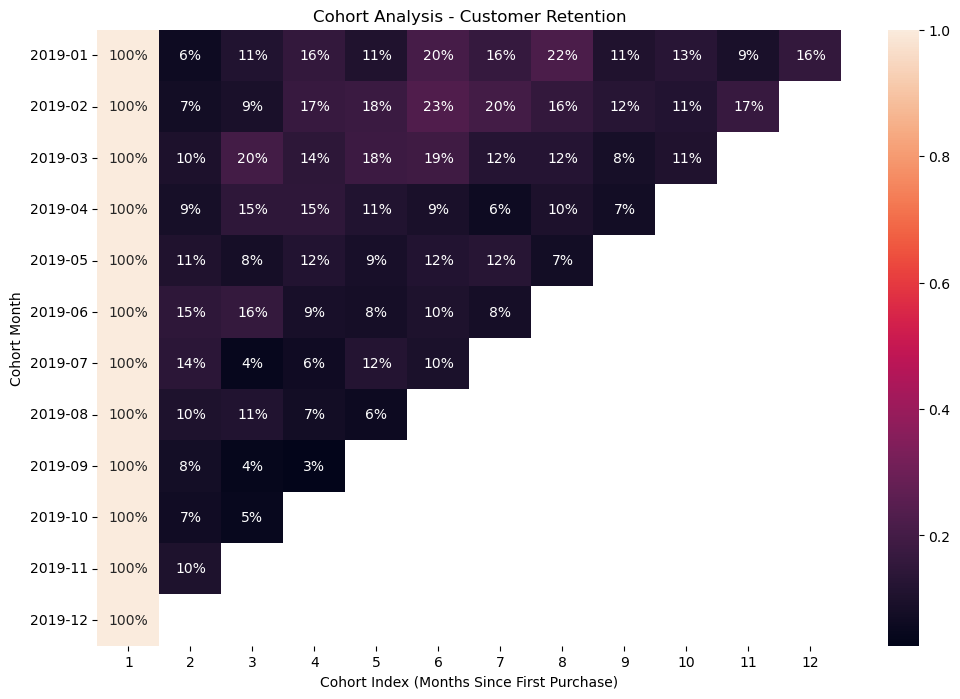

In [305]:
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt='.0%')
plt.title('Cohort Analysis - Customer Retention')
plt.xlabel('Cohort Index (Months Since First Purchase)')
plt.ylabel('Cohort Month')
plt.show()

##### 2. Which Month cohort has maximum retention?

In [306]:
max_retention_cohort = retention.idxmax(axis=1)

In [307]:
month_with_max_retention = max_retention_cohort.iloc[0]

In [308]:
print("Month cohort with maximum retention:", month_with_max_retention)

Month cohort with maximum retention: 1
